In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.columns",None)

from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder

In [86]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [87]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [88]:
print("Train Dataset has ",df_train.shape[0],"Rows and ",df_train.shape[1],"columns.")
print("Test Dataset has ",df_test.shape[0],"Rows and ",df_test.shape[1],"columns.")

Train Dataset has  1460 Rows and  81 columns.
Test Dataset has  1459 Rows and  80 columns.


In [89]:
df_train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 81 entries, Id to SalePrice
dtypes: float64(3), int64(35), object(43)
memory usage: 924.0+ KB


In [90]:
df_train.describe(include="object")

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460       1452      1460   
unique         6        8          15          16          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq        1141     1434         515         504        864       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

In [91]:
df_train.describe(include=[int,float])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

Sample Training

In [92]:
df_train.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1431  1432         120       RL          NaN     4928   Pave   NaN      IR1   
1452  1453         180       RM         35.0     3675   Pave   NaN      Reg   
1250  1251          20       RL         93.0    11160   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
112    113          60       RL         77.0     9965   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1431         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1452         Lvl    AllPub    Inside       Gtl      Edwards       Norm   
1250         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
10           Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
112          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1431       Norm   TwnhsE     1Story            6            6       1976   
1452       Norm   TwnhsE       SLvl            5            5       2005   
1250       Norm     1Fam     1Story            7            5       1968   
10         Norm     1Fam     1Story            5            5       1965   
112        Norm     1Fam     2Story            7            5       2007   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1431          1976     Gable  CompShg     Plywood     Plywood       None   
1452          2005     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1250          1968       Hip  CompShg     BrkFace     BrkFace       None   
10            1965       Hip  CompShg     HdBoard     HdBoard       None   
112           2007     Gable  CompShg     VinylSd     VinylSd      Stone   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1431         0.0        TA        TA     CBlock       Gd       TA   
1452        80.0        TA        TA      PConc       Gd       TA   
1250         0.0        Gd        TA     CBlock       TA       TA   
10           0.0        TA        TA     CBlock       TA       TA   
112        220.0        Gd        TA      PConc       Ex       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1431           No          LwQ         958          Unf           0   
1452           Gd          GLQ         547          Unf           0   
1250           No          ALQ        1065          Unf           0   
10             No          Rec         906          Unf           0   
112            Av          GLQ         984          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1431          0          958    GasA        TA          Y      SBrkr   
1452          0          547    GasA        Gd          Y      SBrkr   
1250       1045         2110    GasA        Ex          Y      SBrkr   
10          134         1040    GasA        Ex          Y      SBrkr   
112         280         1264    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1431       958         0             0        958             0             0   
1452      1072         0             0       1072             1             0   
1250      2110         0             0       2110             1             0   
10        1040         0             0       1040             1             0   
112       1282      1414             0       2696             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1431         2         0             2             1          TA   
1452         1         0             2             1          TA   
1250         2         1             3             1          Ex   
10           1         0             3             1          TA   
112          2         1             4             1          Ex   

   

In [93]:
test_id = df_test["Id"]    ##Storing test id because we need it for submission file.
df_train.drop(columns="Id",inplace=True)
df_test.drop(columns="Id",inplace=True)

In [94]:
null_df = round(df_train.isnull().sum()/len(df_train)*100,2).sort_values().to_frame().rename(columns=
                                                                                    {0:"Train % of Missing Values"})
null_df["Test % of Missing Values"] = round(df_test.isnull().sum()/len(df_train)*100,2)

In [95]:
null_df[(null_df["Train % of Missing Values"]>45) | (null_df["Test % of Missing Values"]>45)]

Train % of Missing Values  Test % of Missing Values
FireplaceQu                      47.26                     50.00
Fence                            80.75                     80.07
Alley                            93.77                     92.60
MiscFeature                      96.30                     96.44
PoolQC                           99.52                     99.73

In [96]:
cols = ["FireplaceQu","Fence","Alley","MiscFeature","PoolQC"]

df_train.drop(columns=cols, inplace=True)
df_test.drop(columns=cols, inplace=True)

In [97]:
target = df_train[["SalePrice"]].reset_index(drop=True)

df_train.drop(columns=["SalePrice"],inplace=True)

df = pd.concat([df_train,df_test]).reset_index(drop=True)

In [98]:
df.shape

(2919, 74)

In [99]:
null_df = df.isnull().sum()[df.isnull().sum()>0].sort_values().to_frame().rename(columns={0:"Total Missing values"})
null_df["% of Missing Values"] = round(null_df["Total Missing values"]/len(df)*100,2)
null_df["Feature Data Type"] = df[null_df.index.tolist()].dtypes

In [100]:
null_df

Total Missing values  % of Missing Values Feature Data Type
BsmtUnfSF                        1                 0.03           float64
GarageArea                       1                 0.03           float64
GarageCars                       1                 0.03           float64
KitchenQual                      1                 0.03            object
Electrical                       1                 0.03            object
TotalBsmtSF                      1                 0.03           float64
BsmtFinSF2                       1                 0.03           float64
BsmtFinSF1                       1                 0.03           float64
SaleType                         1                 0.03            object
Exterior1st                      1                 0.03            object
Exterior2nd                      1                 0.03            object
BsmtHalfBath                     2                 0.07           float64
Utilities                        2                 0.07            object
Functional                       2                 0.07            object
BsmtFullBath                     2                 0.07           float64
MSZoning                         4                 0.14            object
MasVnrArea                      23                 0.79           float64
MasVnrType                      24                 0.82            object
BsmtFinType1                    79                 2.71            object
BsmtFinType2                    80                 2.74            object
BsmtQual                        81                 2.77            object
BsmtCond                        82                 2.81            object
BsmtExposure                    82                 2.81            object
GarageType                     157                 5.38            object
GarageCond                     159                 5.45            object
GarageYrBlt                    159                 5.45           float64
GarageFinish                   159                 5.45            object
GarageQual                     159                 5.45            object
LotFrontage                    486                16.65           float64

In [101]:
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    df[col] = df[col].fillna(0)

for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df[col] = df[col].fillna('None')

for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    df[col] = df[col].fillna('None')

In [102]:
df['MSZoning'] = df.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [103]:
cat_cols = ['Utilities','Exterior1st','Exterior2nd','MasVnrType','Electrical',
            'KitchenQual','Functional','SaleType']

imputer = SimpleImputer(strategy="most_frequent")
df[cat_cols] = imputer.fit_transform(df[cat_cols])

In [104]:
df["LotFrontage"] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
df["MasVnrArea"]  = df.groupby("MasVnrType")["MasVnrArea"].transform(lambda x: x.fillna(x.median()))
df["BsmtFinSF1"]  = df.groupby("BsmtFinType1")["BsmtFinSF1"].transform(lambda x: x.fillna(x.median()))
df["BsmtFinSF2"]  = df.groupby("BsmtFinType2")["BsmtFinSF2"].transform(lambda x: x.fillna(x.median()))

In [105]:
df["BsmtFullBath"] = df["BsmtFullBath"].fillna(0.0)
df["BsmtHalfBath"] = df["BsmtHalfBath"].fillna(0.0)
df["TotalBsmtSF"]  = df["BsmtFinSF1"] + df["BsmtFinSF2"]
df["BsmtUnfSF"]    = df["BsmtUnfSF"].fillna(df["BsmtUnfSF"].median())

In [106]:
print("Total Missing Values Left is:",df.isnull().sum().sum())

Total Missing Values Left is: 0


In [107]:
train_df = pd.concat([df.iloc[:len(target["SalePrice"]),:],target],axis=1)
test_df = df.iloc[len(target["SalePrice"]):,:]

In [108]:
print("Dimension of train data is:",train_df.shape)
print("Dimension of test data is:",test_df.shape)

Dimension of train data is: (1460, 75)
Dimension of test data is: (1459, 74)


In [109]:
train_df["SalePrice"].describe().to_frame().T

count          mean           std      min       25%       50%  \
SalePrice  1460.0  180921.19589  79442.502883  34900.0  129975.0  163000.0   

                75%       max  
SalePrice  214000.0  755000.0

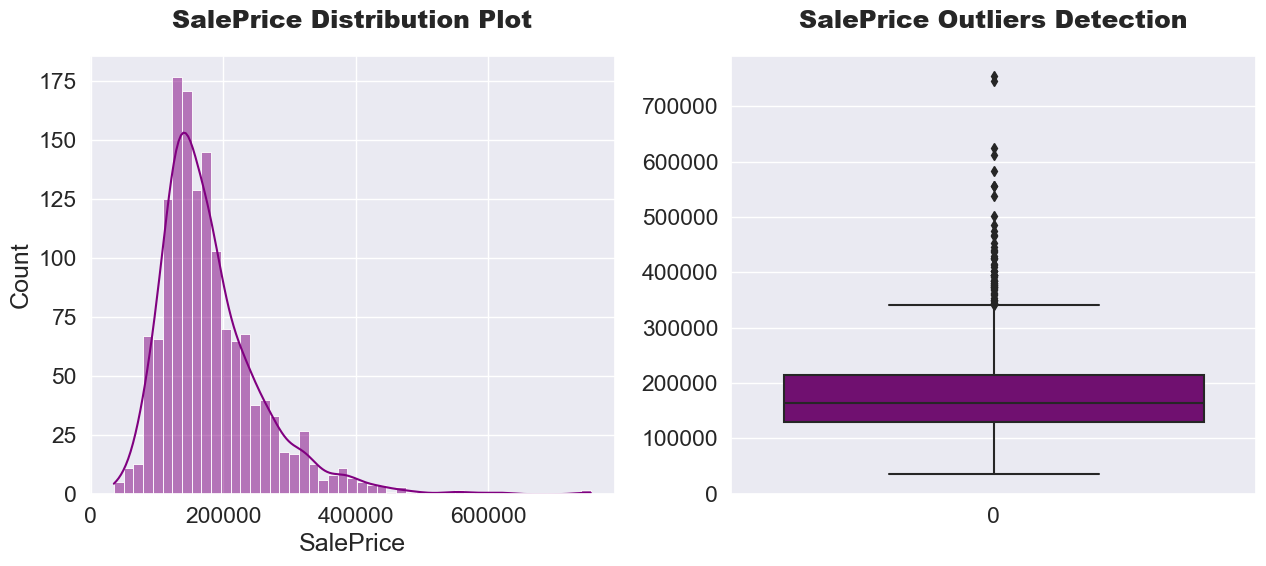

In [110]:
plt.figure(figsize=(13,6))

plt.subplot(1,2,1)
sns.histplot(train_df["SalePrice"],color="purple",kde=True)
plt.title("SalePrice Distribution Plot",fontweight="black",pad=20,size=18)

plt.subplot(1,2,2)
sns.boxplot(train_df["SalePrice"],color="purple")
plt.title("SalePrice Outliers Detection",fontweight="black",pad=20,size=18)
plt.tight_layout()
plt.show()

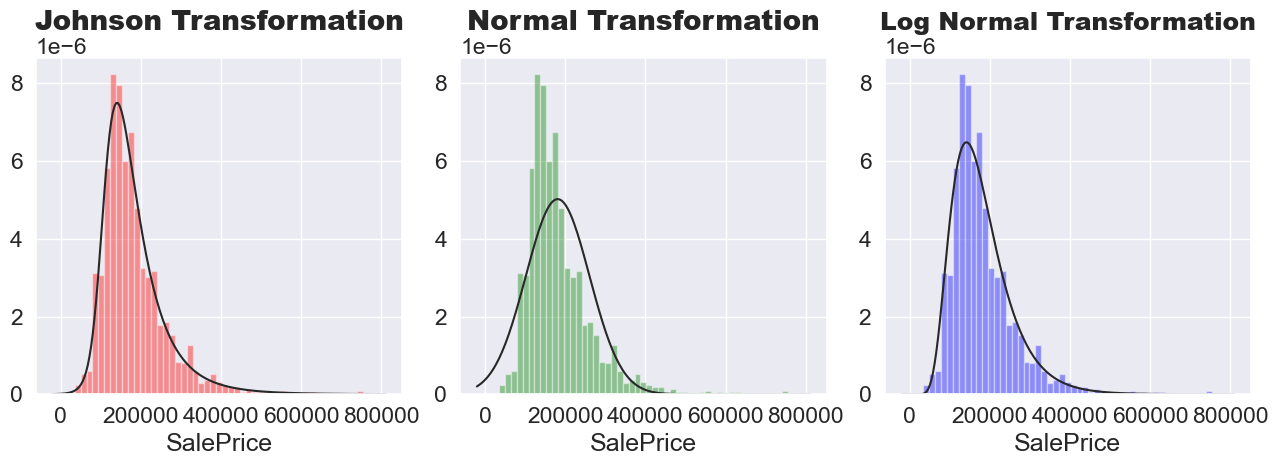

In [111]:
plt.figure(figsize=(13,5))

plt.subplot(1,3,1)
sns.distplot(train_df["SalePrice"],kde=False, fit=stats.johnsonsu,color="red")
plt.title("Johnson Transformation",fontweight="black",size=20,pad=20)

plt.subplot(1,3,2)
sns.distplot(train_df["SalePrice"],kde=False, fit=stats.norm,color="green")
plt.title("Normal Transformation",fontweight="black",size=20,pad=20)

plt.subplot(1,3,3)
sns.distplot(train_df["SalePrice"],kde=False,fit=stats.lognorm,color="blue")
plt.title("Log Normal Transformation",fontweight="black",size=18,pad=20)
plt.tight_layout()
plt.show()

In [112]:
con_cols = ["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF",
            "1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF",
            "EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal"]

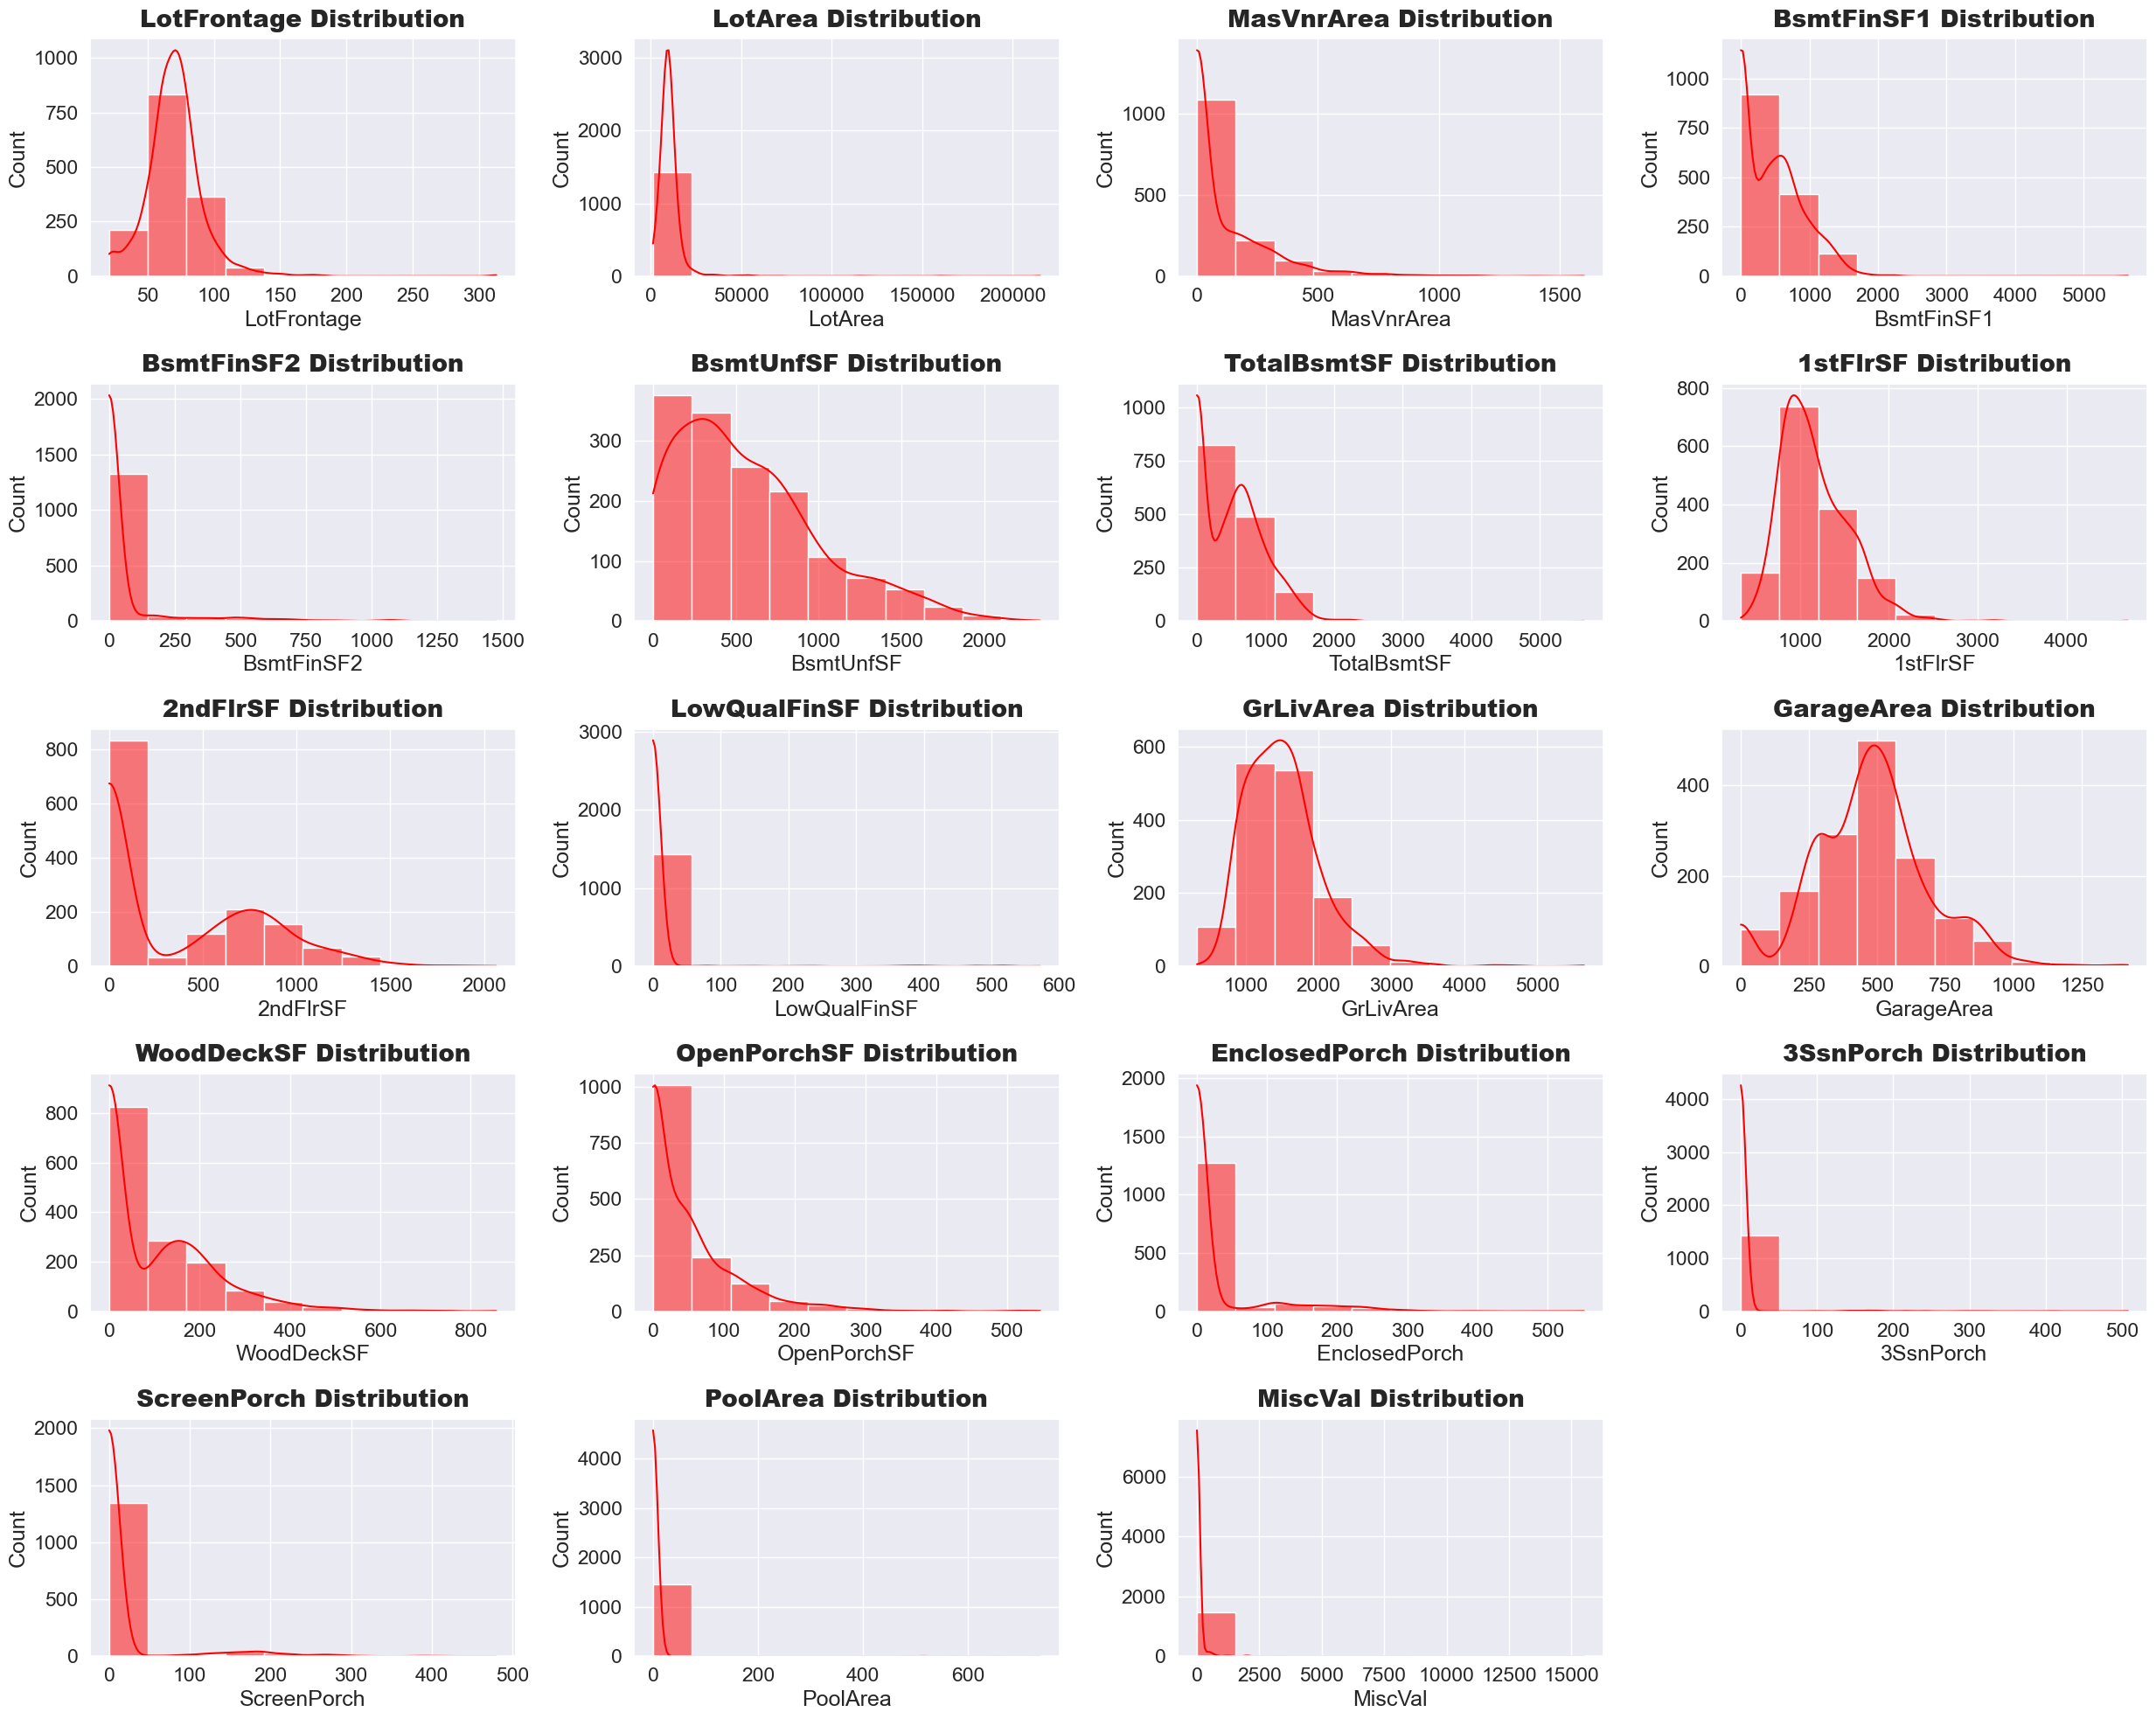

In [113]:
plt.figure(figsize=(25,20))
for index,column in enumerate(con_cols):
    plt.subplot(5,4,index+1)
    sns.histplot(train_df[column],bins=10,kde=True,color="red")
    plt.title(f"{column} Distribution",fontweight="black",size=20,pad=10)
    plt.tight_layout()

In [114]:
con_cols.append("SalePrice")

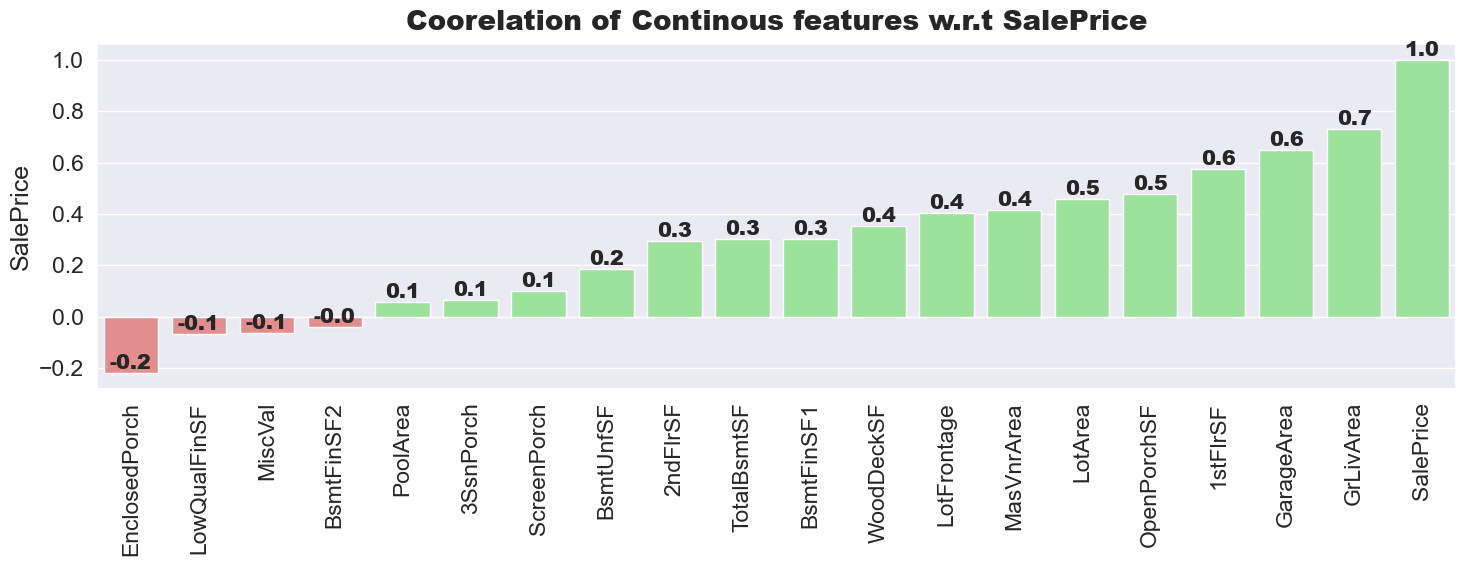

In [115]:
corr = train_df[con_cols].corr(method="spearman")["SalePrice"].sort_values()

plt.figure(figsize=(15,6))
sns.barplot(x=corr.index, y=corr, palette=["lightcoral" if v < 0 else "lightgreen" for v in corr])
for i, v in enumerate(corr):
    plt.text(i, v, f"{v:.1f}", ha="center", va="bottom",size=15,fontweight="black")

plt.title("Coorelation of Continous features w.r.t SalePrice",fontweight="black",size=20,pad=10)
plt.xticks(rotation=90)
plt.tight_layout()

In [116]:
cat_cols = train_df.select_dtypes(include="object").columns.tolist()

In [117]:
def boxplot(col_list):
    plt.figure(figsize=(22,12))
    for index,column in enumerate(col_list):
        plt.subplot(2,4,index+1)
        sns.boxplot(x=column, y="SalePrice", data=train_df)
        plt.title(f"{column} vs SalePrice",fontweight="black",pad=10,size=20)
        plt.xticks(rotation=90)
        plt.tight_layout()

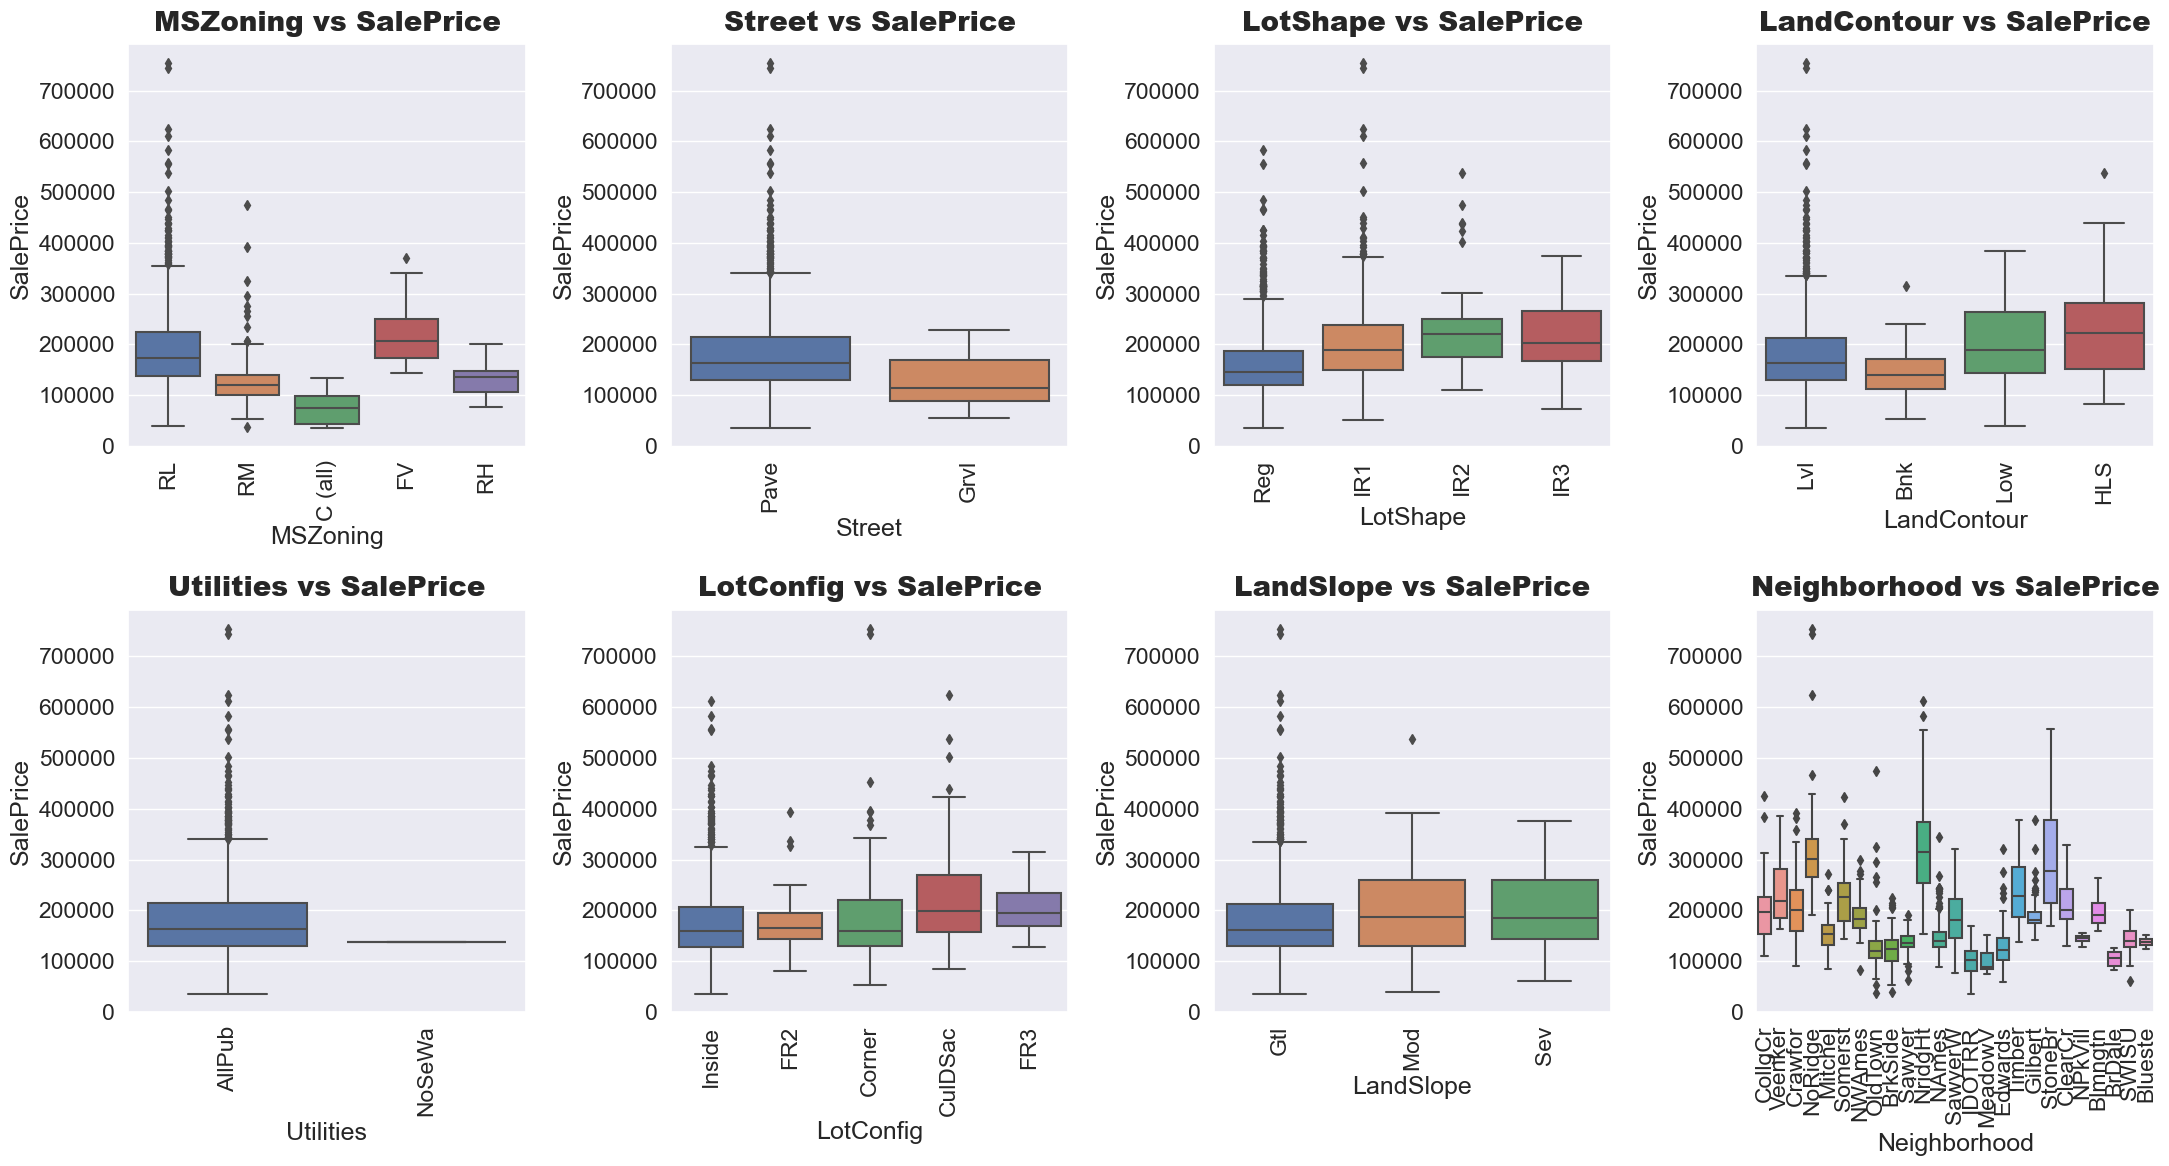

In [118]:
boxplot(cat_cols[0:8])

In [119]:
train_df.drop(columns=["Utilities","Street"],inplace=True)
test_df.drop(columns=["Utilities","Street"],inplace=True)

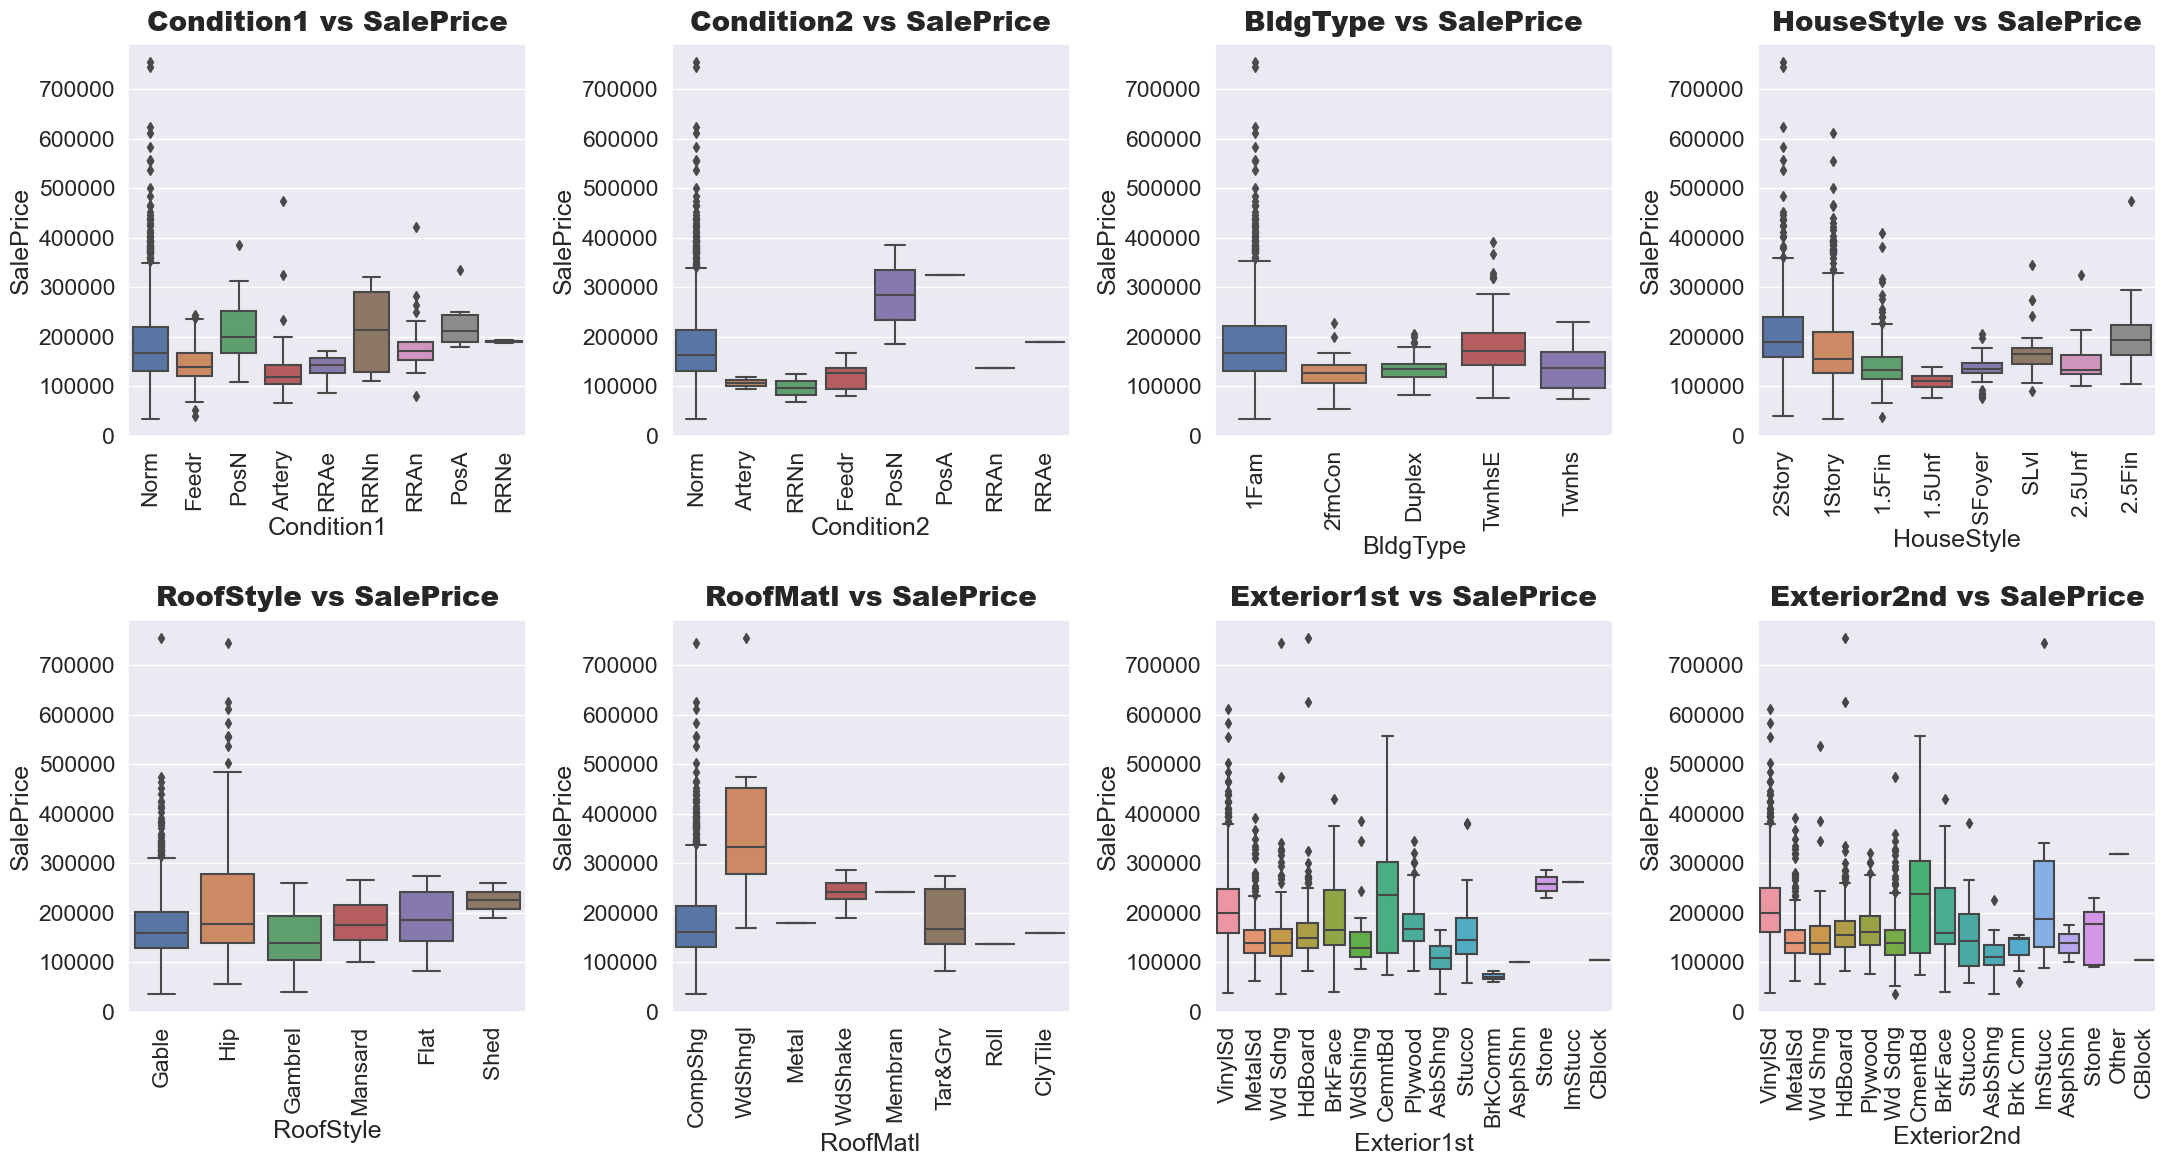

In [120]:
boxplot(cat_cols[8:16])

In [121]:
train_df.drop(columns=["RoofMatl"],inplace=True)
test_df.drop(columns=["RoofMatl"],inplace=True)

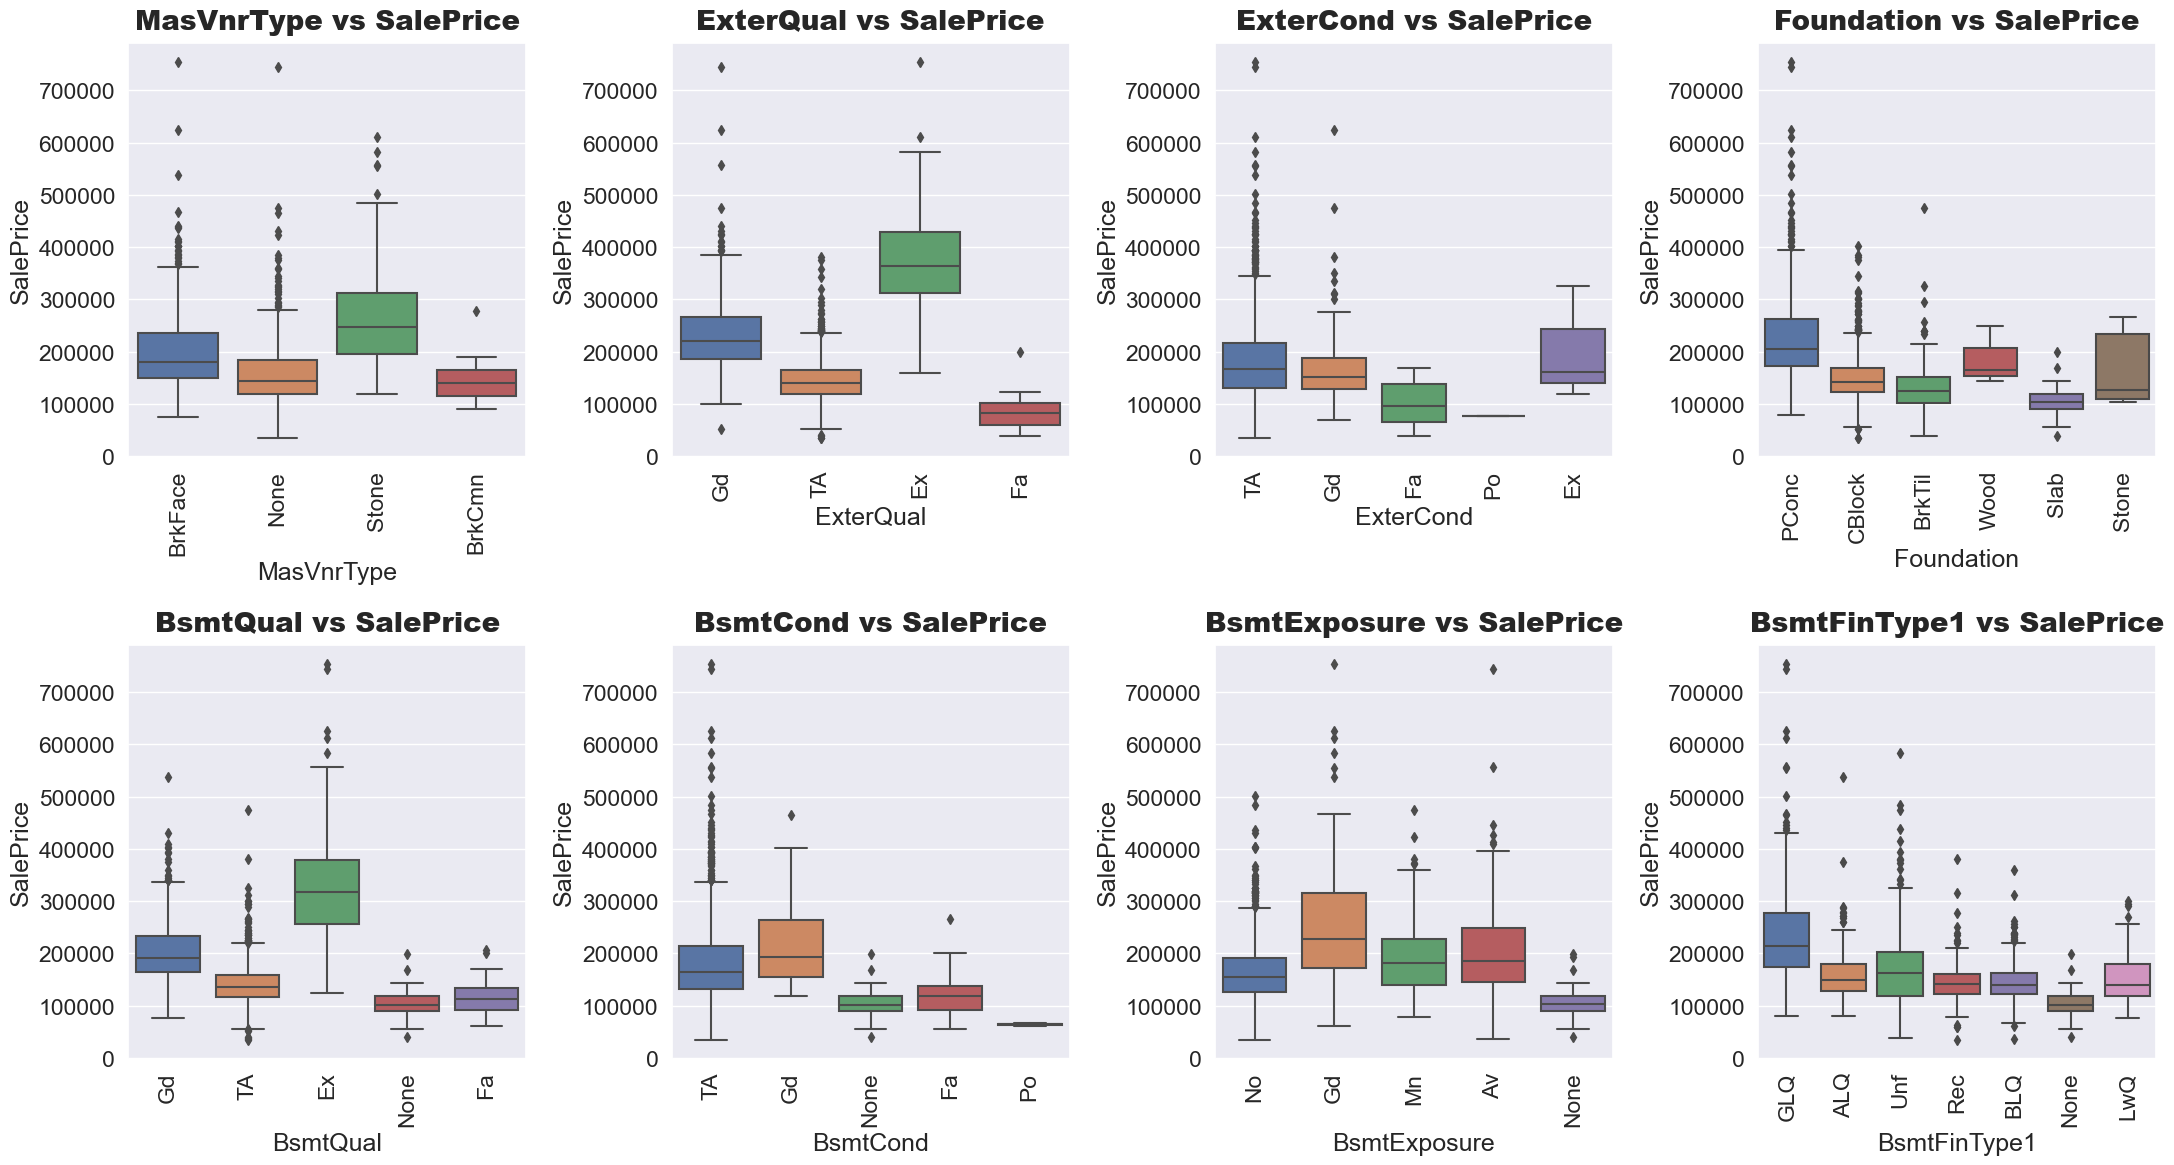

In [122]:
boxplot(cat_cols[16:24])

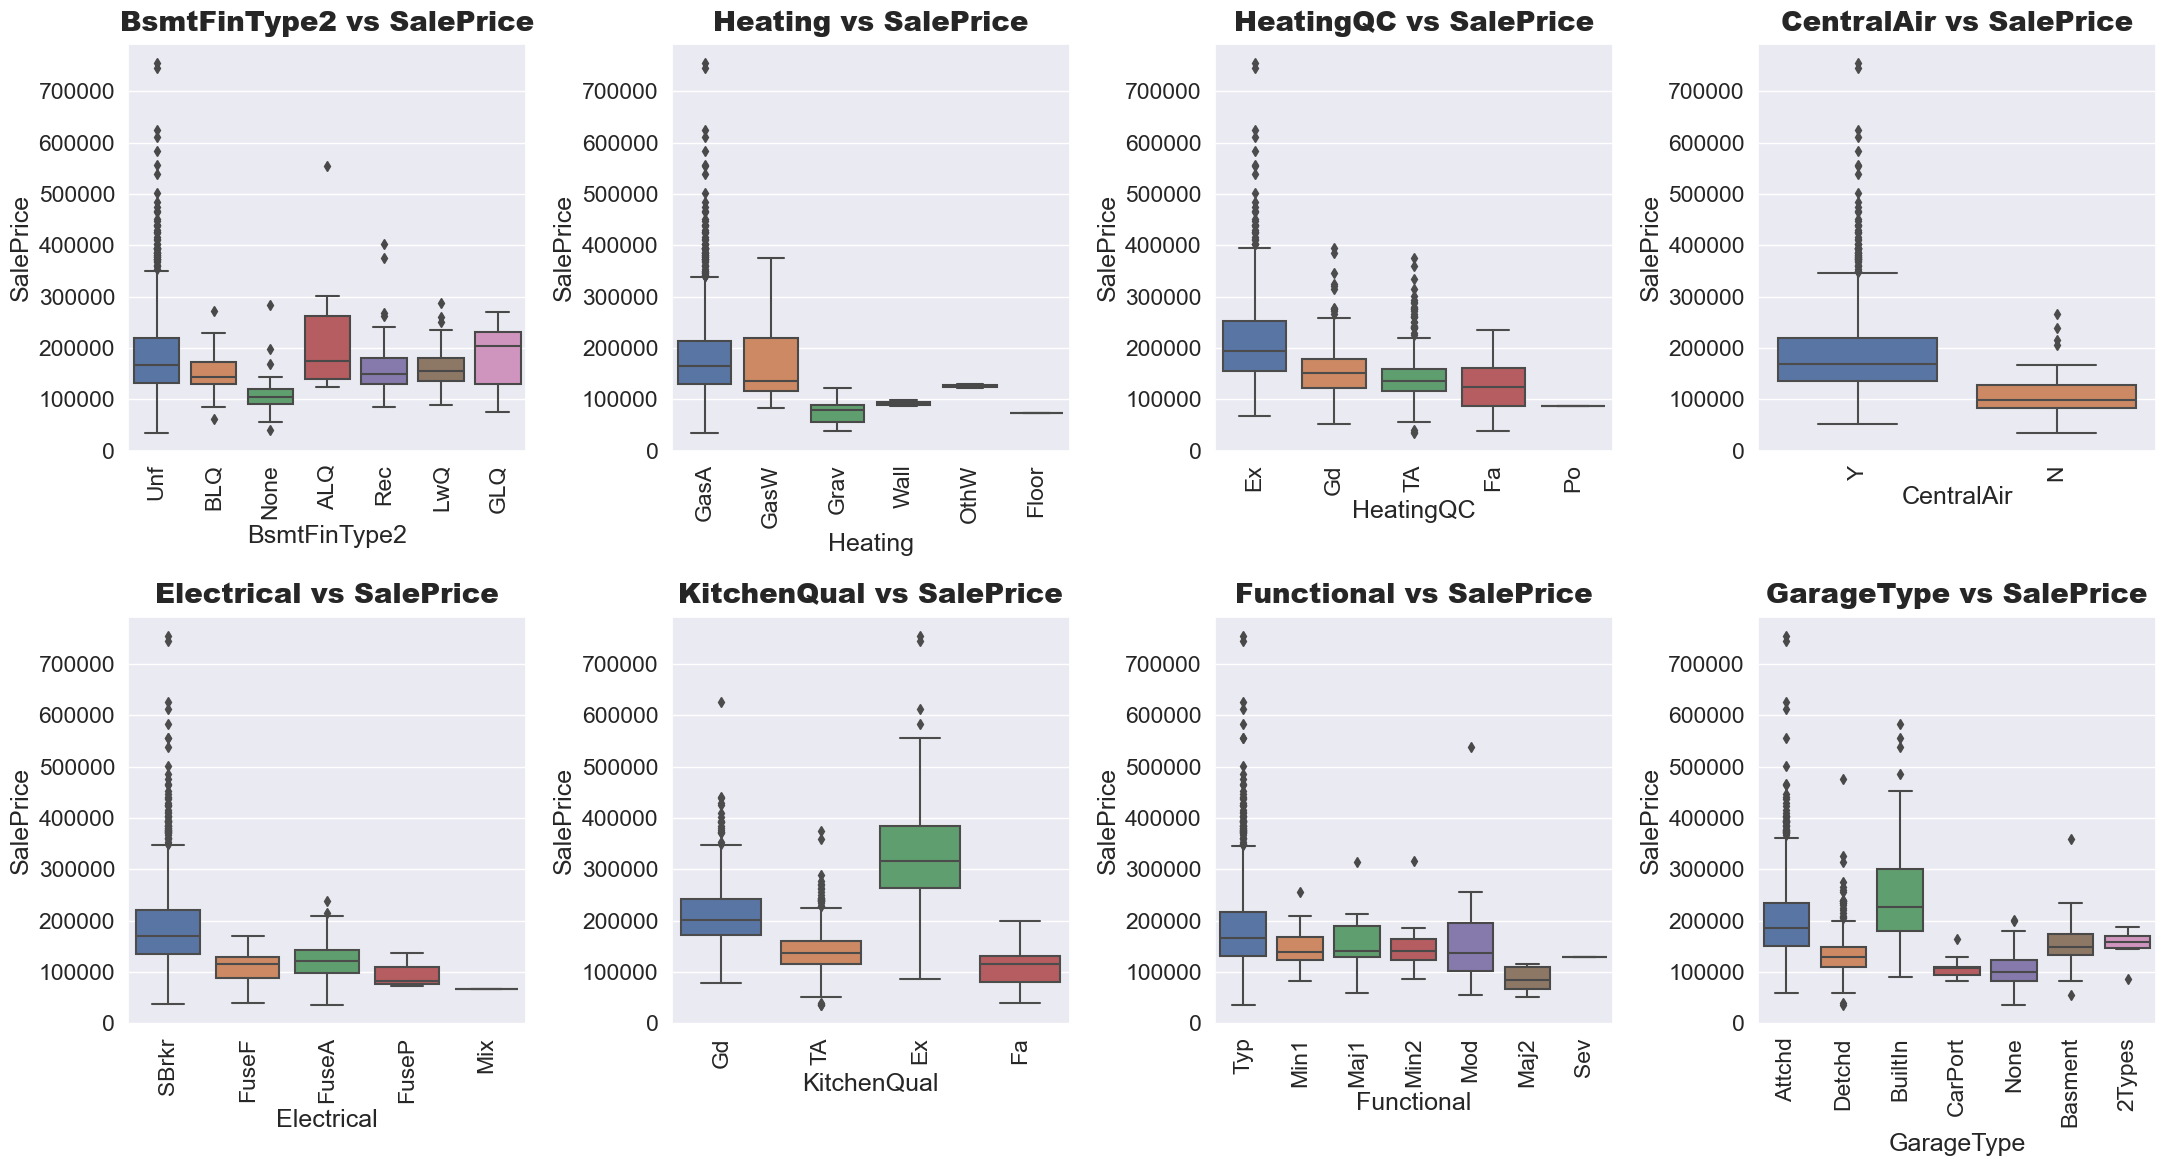

In [123]:
boxplot(cat_cols[24:32])

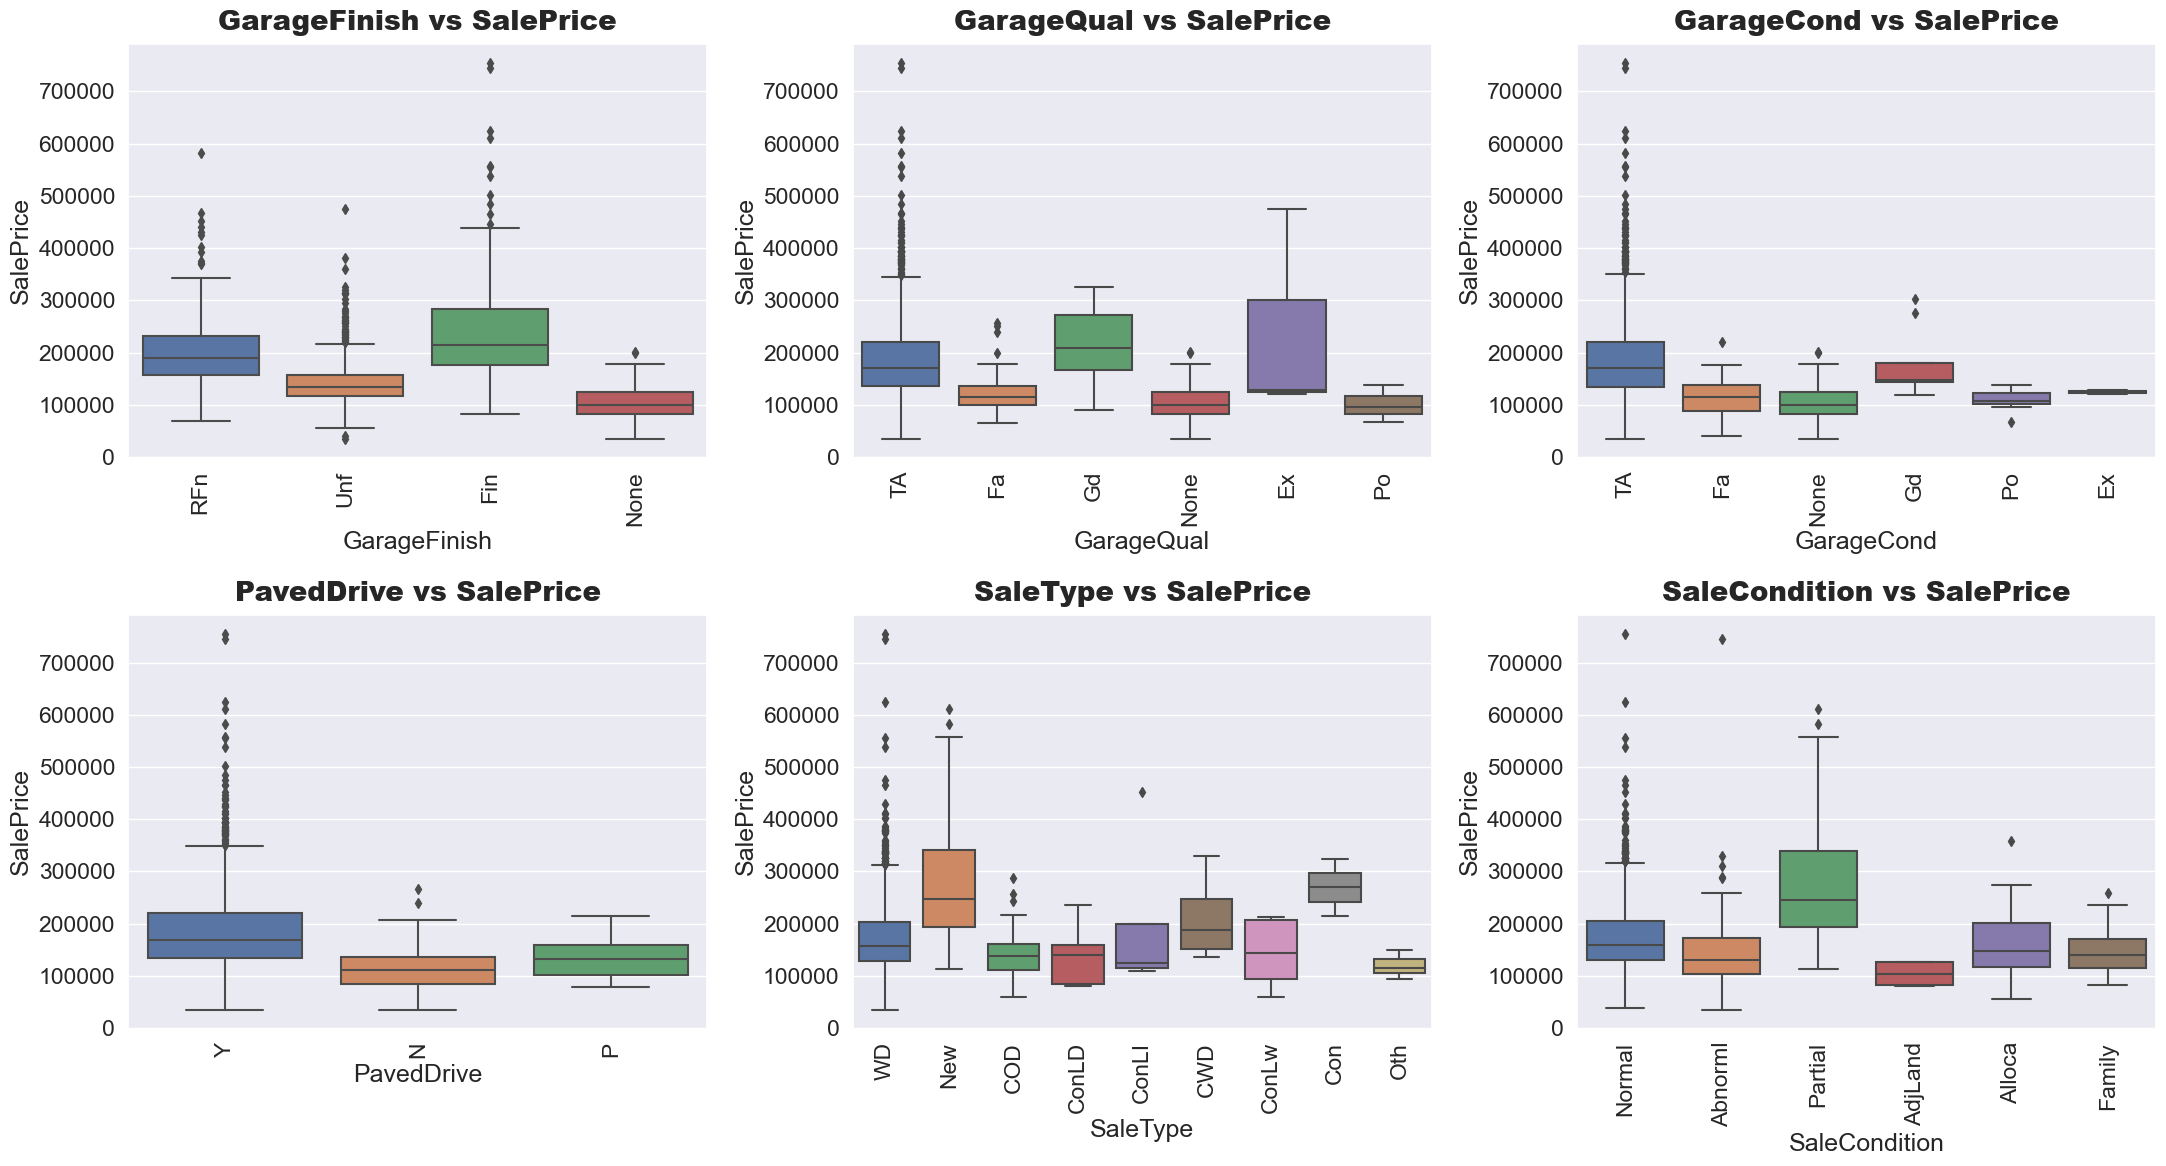

In [124]:
plt.figure(figsize=(22,12))
for index,column in enumerate(cat_cols[32:]):
    plt.subplot(2,3,index+1)
    sns.boxplot(x=column, y="SalePrice", data=train_df)
    plt.title(f"{column} vs SalePrice",fontweight="black",pad=10,size=20)
    plt.xticks(rotation=90)
    plt.tight_layout()

In [125]:
dis_cols = ["OverallQual","OverallCond","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr",
            "KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageCars","MoSold"]

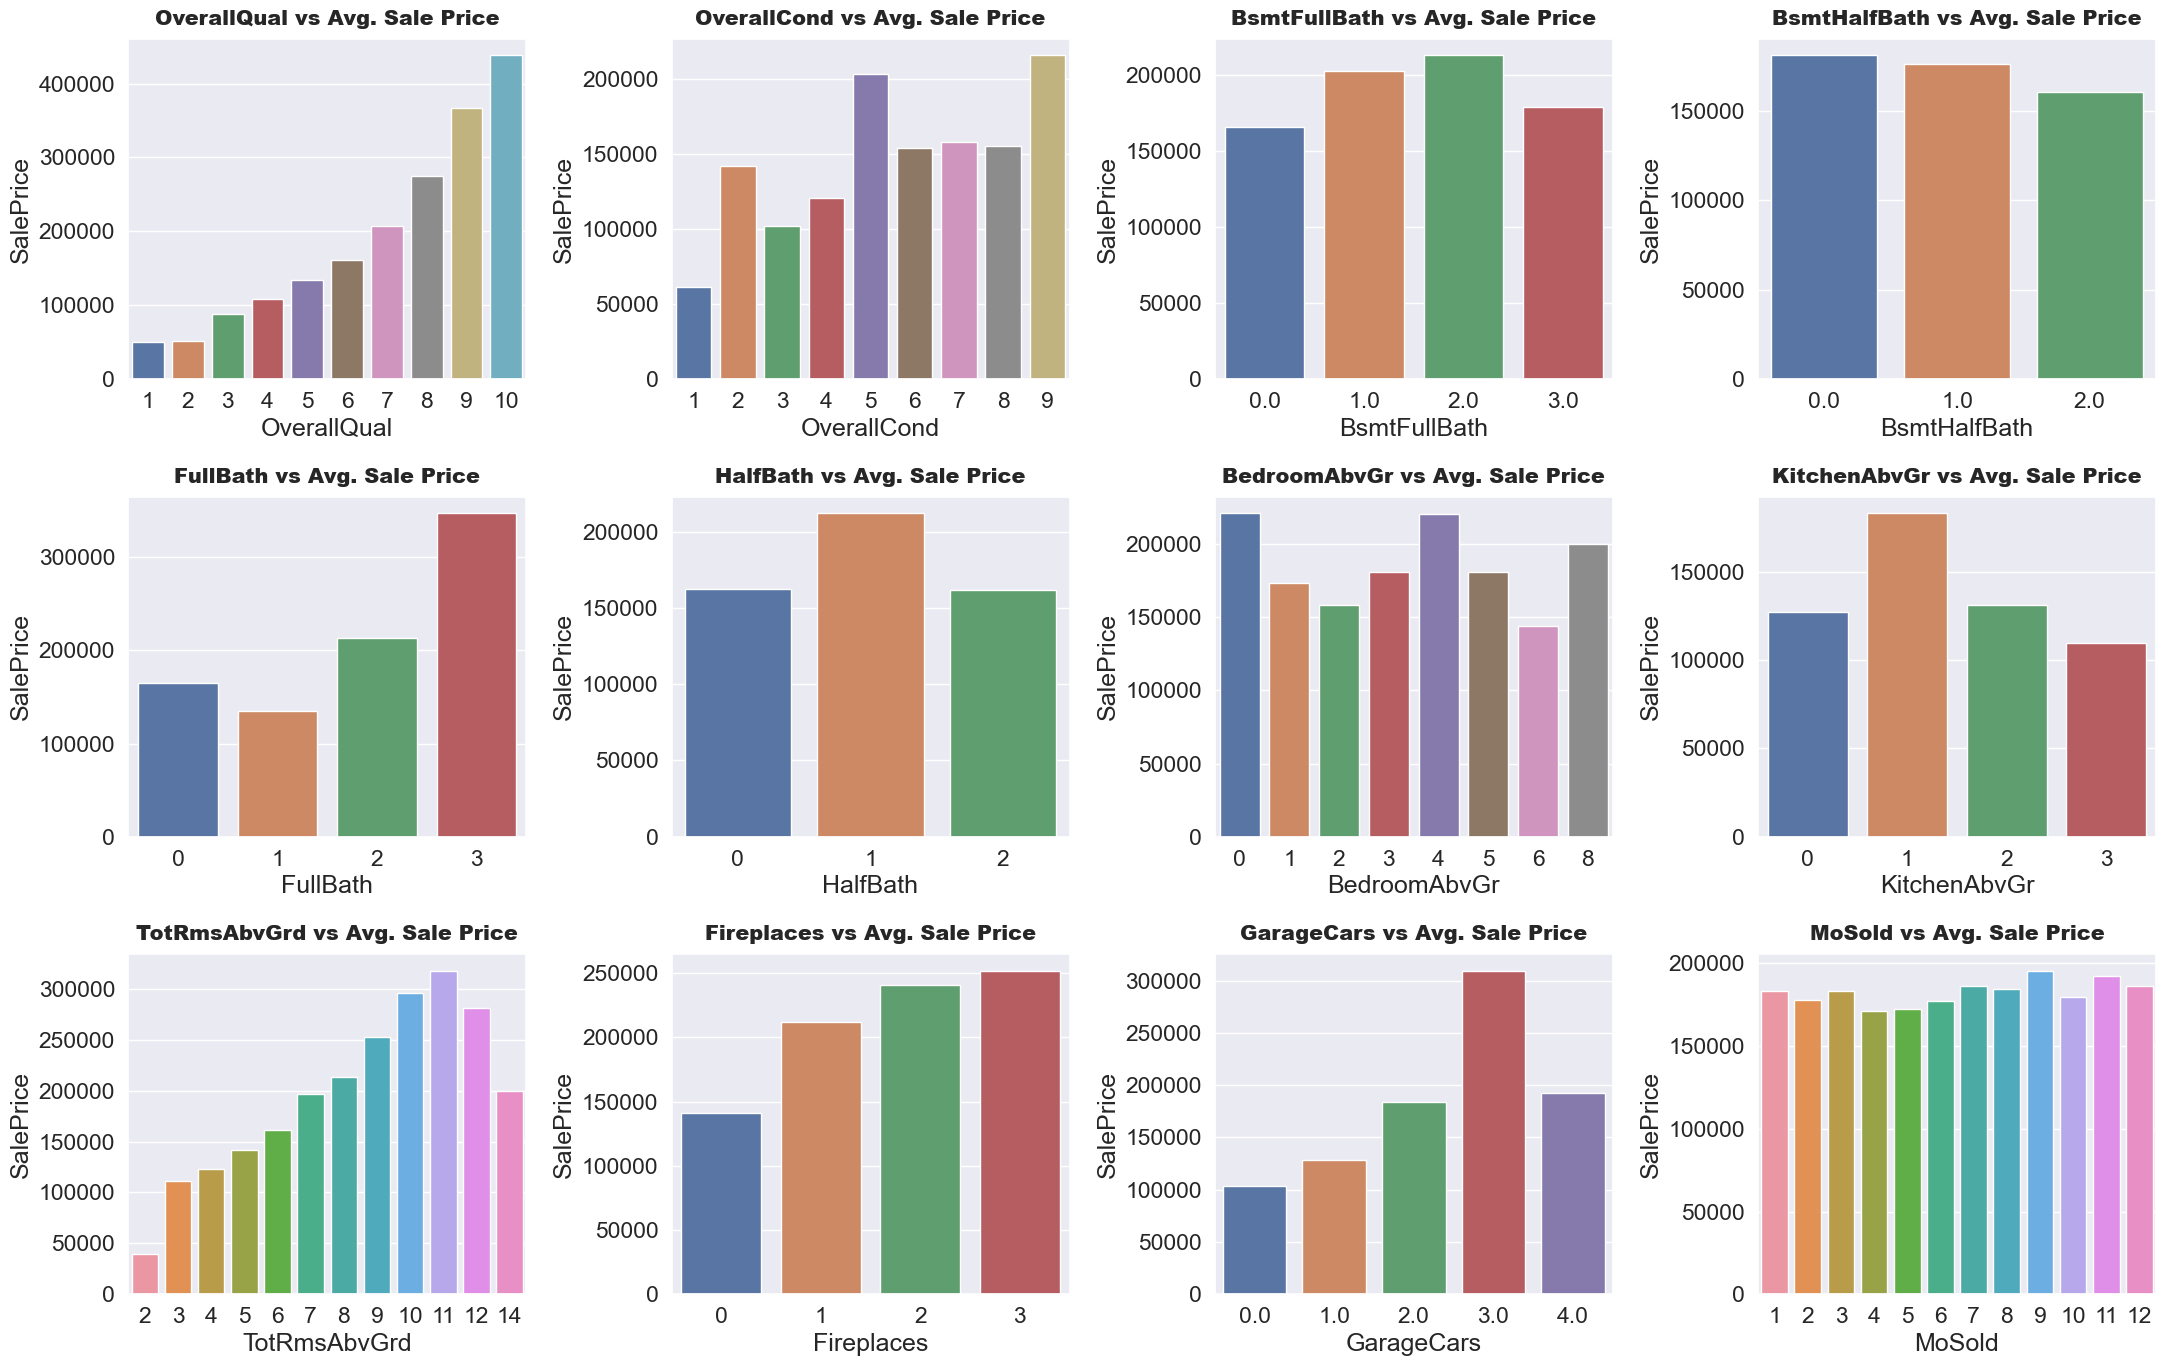

In [126]:
plt.figure(figsize=(22,14))
for index,column in enumerate(dis_cols):
    data = train_df.groupby(column)["SalePrice"].mean()
    plt.subplot(3,4,index+1)
    sns.barplot(x=data.index, y=data)
    plt.title(f"{column} vs Avg. Sale Price",fontweight="black",size=15,pad=10)
    plt.tight_layout()

FEATURE ENGINEERING

In [127]:
train_df['RenovationStatus'] = (train_df['YearBuilt'] != train_df['YearRemodAdd']).astype(int)
test_df['RenovationStatus']  = (test_df['YearBuilt'] != test_df['YearRemodAdd']).astype(int)

In [128]:
train_df['AgeAtSale'] = train_df['YrSold'] - train_df['YearBuilt']
test_df['AgeAtSale'] = test_df['YrSold'] - test_df['YearBuilt']

In [129]:
train_df.drop(columns=["YearBuilt","YrSold","YearRemodAdd"],inplace=True)
test_df.drop(columns=["YearBuilt","YrSold","YearRemodAdd"],inplace=True)

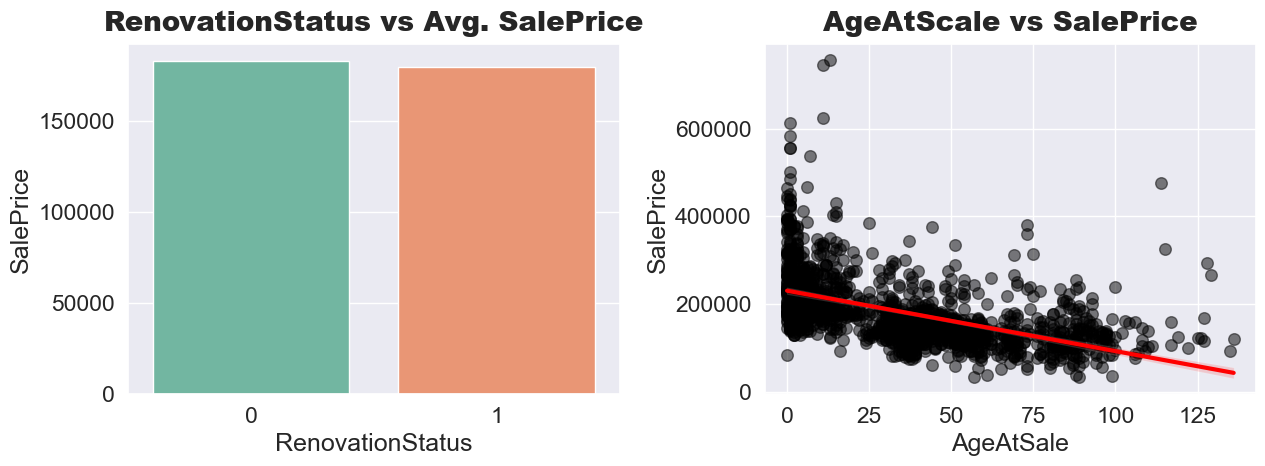

In [130]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
data=train_df.groupby("RenovationStatus")["SalePrice"].mean()
sns.barplot(x=data.index,y=data,palette="Set2")
plt.title("RenovationStatus vs Avg. SalePrice",pad=10,size=20,fontweight="black")
plt.subplot(1,2,2)
sns.regplot(x=train_df["AgeAtSale"],y=train_df["SalePrice"],color="black", scatter_kws={'s': 70, 'alpha': 0.5}, 
                line_kws={'color': 'red', 'lw': 3})
plt.title("AgeAtScale vs SalePrice",pad=10,size=20,fontweight="black")
plt.tight_layout()
plt.show()

In [131]:
train_df["Total_Bathrooms"] = (train_df["FullBath"] + (0.5 * train_df["HalfBath"]) + 
                               train_df["BsmtFullBath"] + (0.5 * train_df["BsmtHalfBath"]))

In [132]:
test_df["Total_Bathrooms"] = (test_df["FullBath"] + (0.5 * test_df["HalfBath"]) + 
                               test_df["BsmtFullBath"] + (0.5 * test_df["BsmtHalfBath"]))

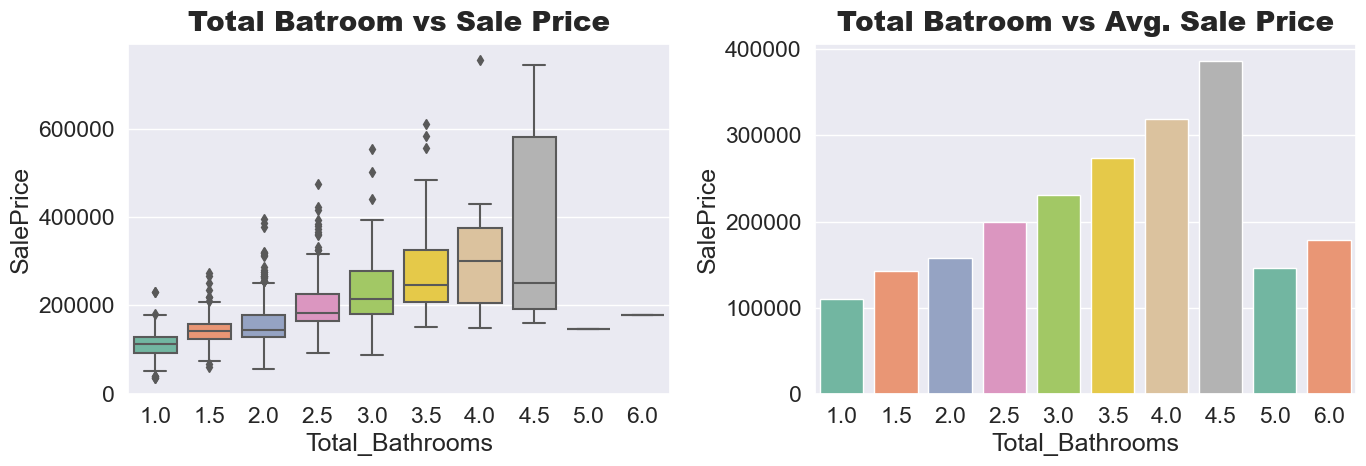

In [133]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.boxplot(x=train_df["Total_Bathrooms"], y=train_df["SalePrice"], palette="Set2")
plt.title("Total Batroom vs Sale Price",fontweight="black",size=20,pad=10)

plt.subplot(1,2,2)
avg = train_df.groupby("Total_Bathrooms")["SalePrice"].mean()
sns.barplot(x=avg.index,y=avg,palette="Set2")
plt.title("Total Batroom vs Avg. Sale Price",fontweight="black",size=20,pad=10)
plt.tight_layout()
plt.show()

In [134]:
train_df['Total_Porch_SF'] = (train_df['OpenPorchSF'] + train_df['3SsnPorch'] +train_df['EnclosedPorch'] +
                              train_df['ScreenPorch'] + train_df['WoodDeckSF'])

In [135]:
test_df['Total_Porch_SF'] = (test_df['OpenPorchSF'] + test_df['3SsnPorch'] +test_df['EnclosedPorch'] +
                              test_df['ScreenPorch'] + test_df['WoodDeckSF'])

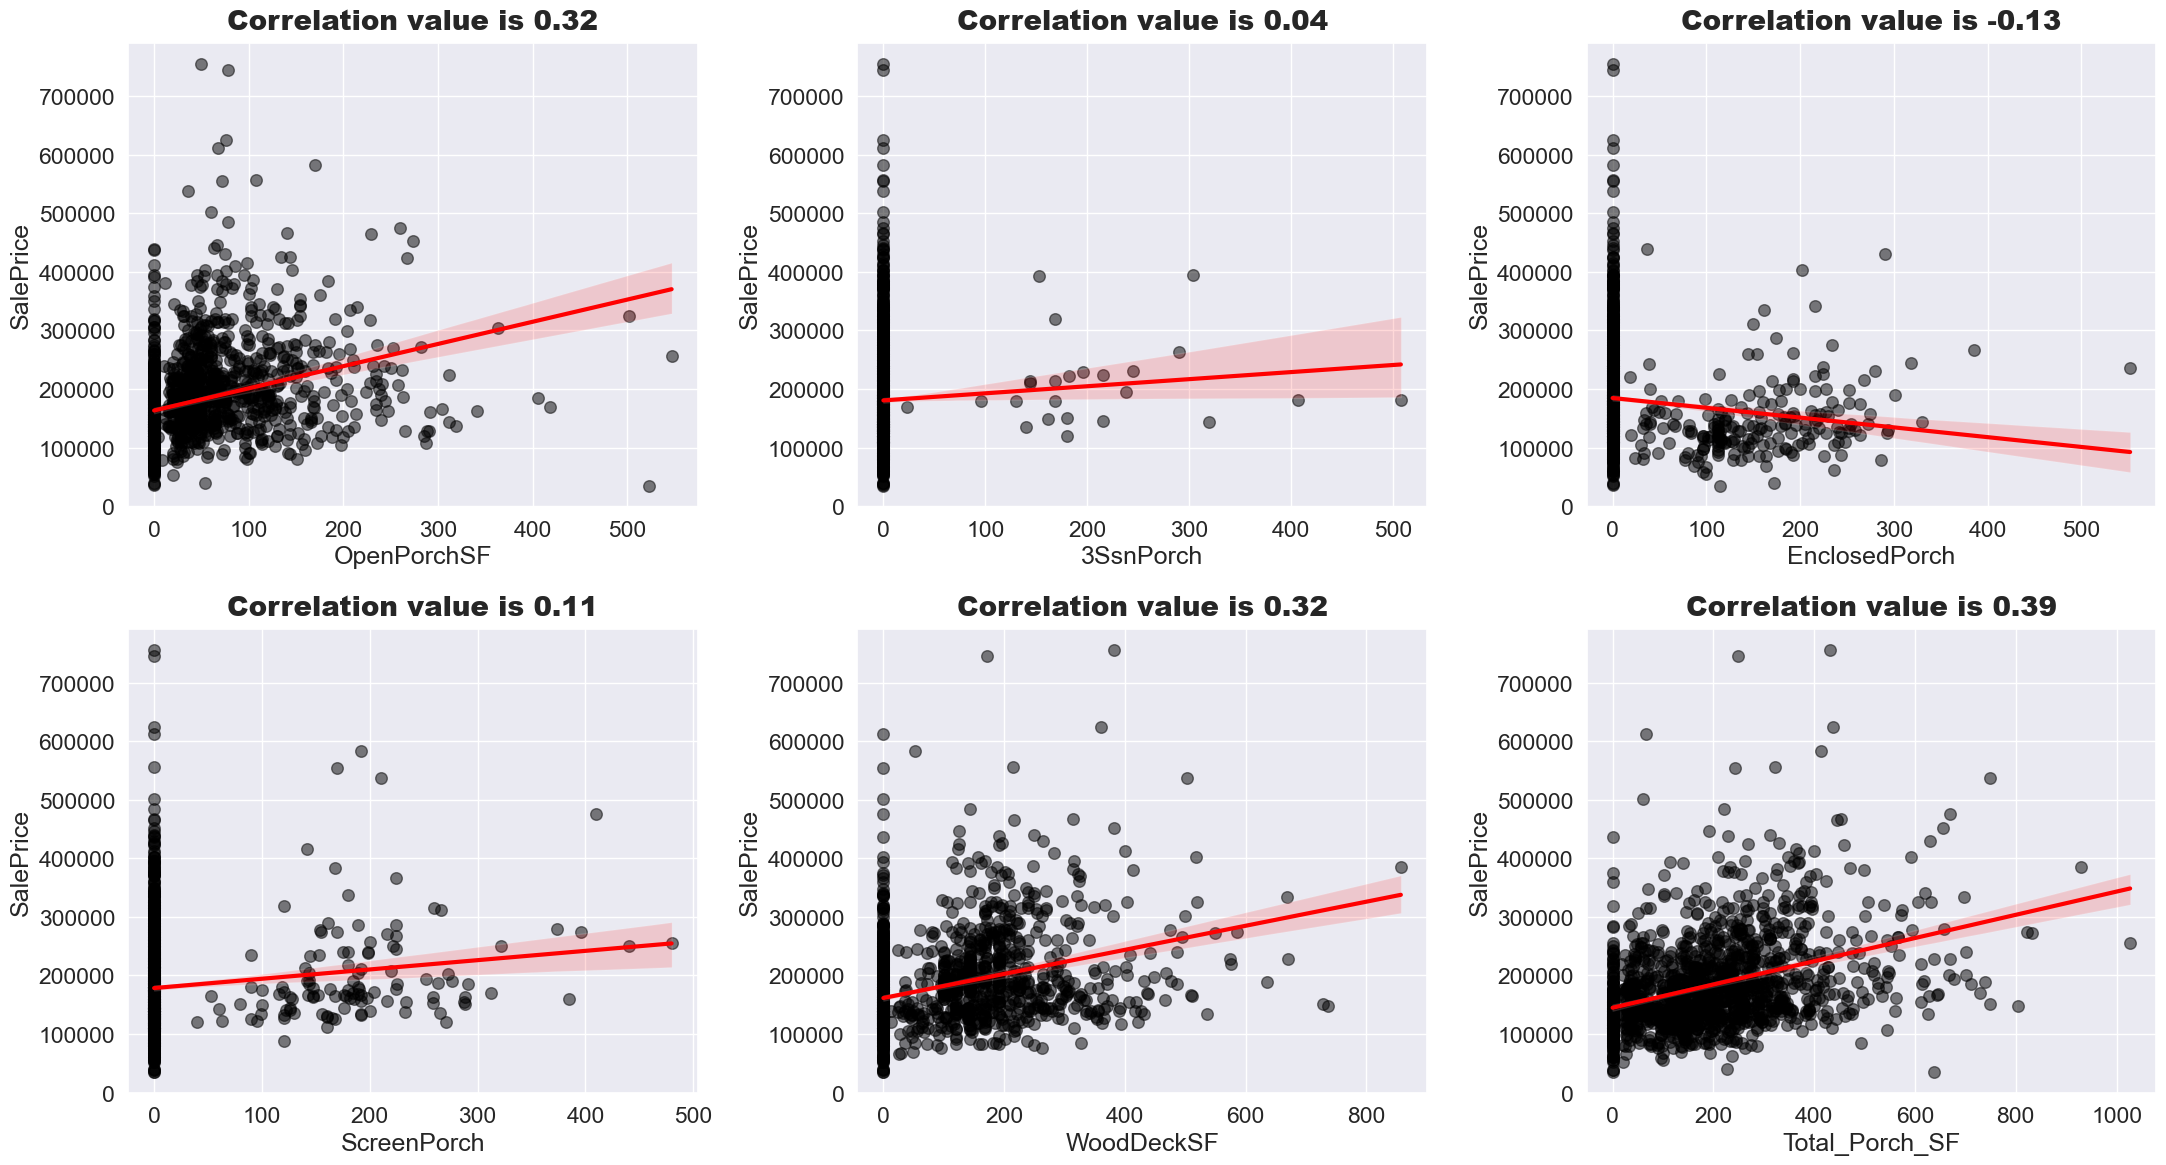

In [136]:
cols = ["OpenPorchSF","3SsnPorch","EnclosedPorch","ScreenPorch","WoodDeckSF","Total_Porch_SF"]

plt.figure(figsize=(22,12))
for index,column in enumerate(cols):
    plt.subplot(2,3,index+1)
    sns.regplot(x=train_df[column],y=train_df["SalePrice"],color="black", scatter_kws={'s': 70, 'alpha': 0.5}, 
                line_kws={'color': 'red', 'lw': 3})
    corr = round(train_df[[column,"SalePrice"]].corr()["SalePrice"][0],2)
    plt.title(f"Correlation value is {corr}",pad=10,size=20,fontweight="black")
    plt.tight_layout()

In [137]:
cols = ["3SsnPorch","EnclosedPorch","ScreenPorch"]

train_df.drop(columns=cols,inplace=True)
test_df.drop(columns=cols,inplace=True)

In [138]:
train_df['Total_sqr_footage']=(train_df['BsmtFinSF1']+train_df['BsmtFinSF2']+train_df['1stFlrSF']+train_df['2ndFlrSF'])
test_df['Total_sqr_footage'] =(test_df['BsmtFinSF1']+test_df['BsmtFinSF2']+test_df['1stFlrSF']+test_df['2ndFlrSF'])

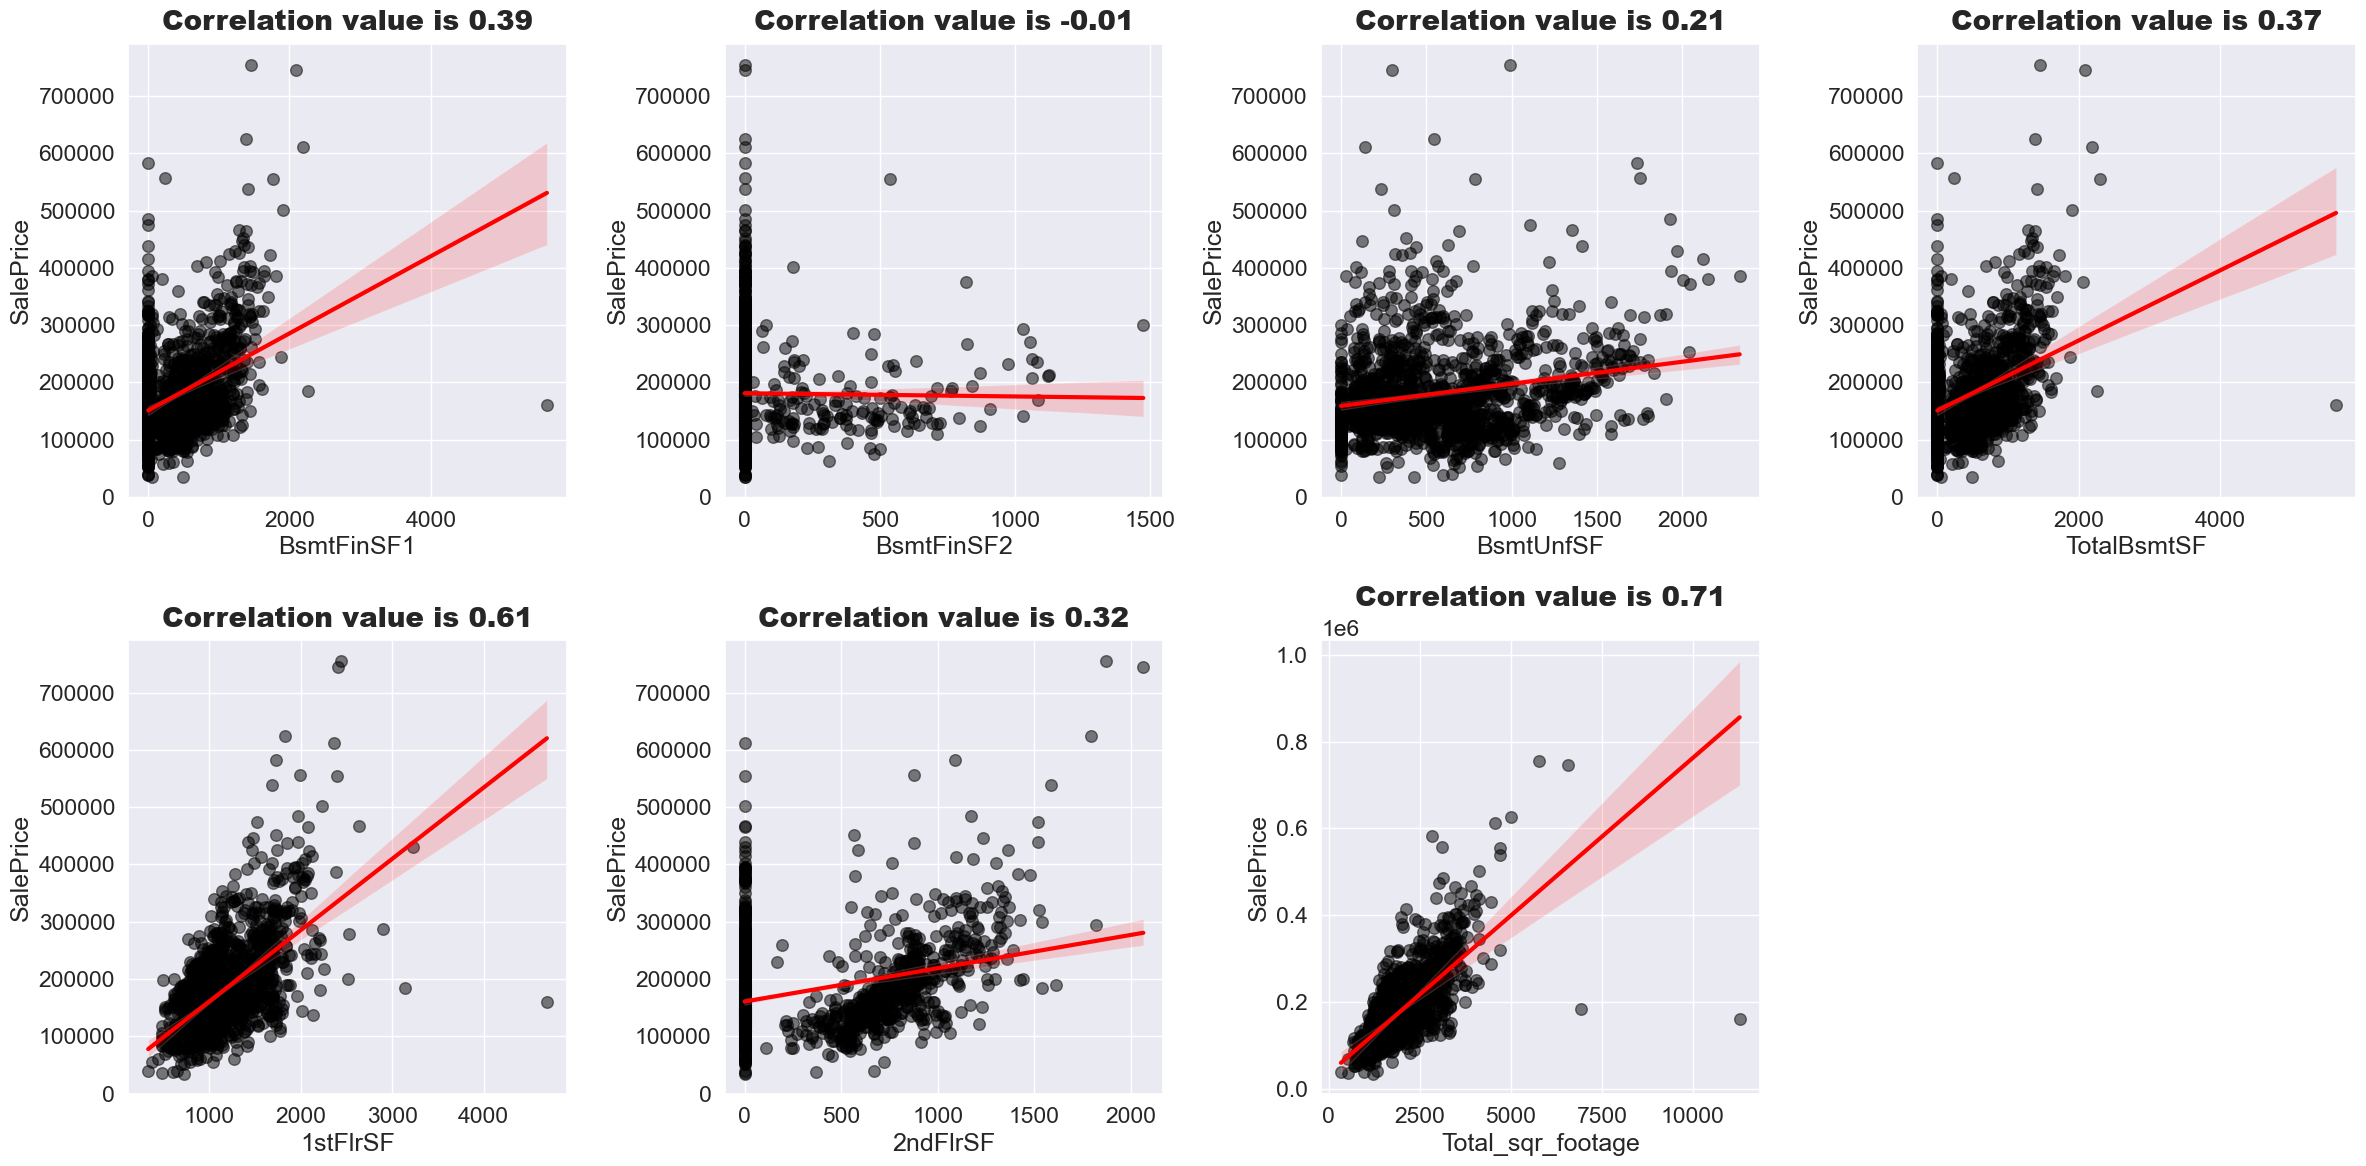

In [139]:
cols = ["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","Total_sqr_footage"]

plt.figure(figsize=(24,12))
for index,column in enumerate(cols):
    plt.subplot(2,4,index+1)
    sns.regplot(x=train_df[column],y=train_df["SalePrice"],color="black", scatter_kws={'s': 70, 'alpha': 0.5}, 
                line_kws={'color': 'red', 'lw': 3})
    corr = round(train_df[[column,"SalePrice"]].corr()["SalePrice"][0],2)
    plt.title(f"Correlation value is {corr}",pad=10,size=20,fontweight="black")
    plt.tight_layout()

In [140]:
cols = ["BsmtFinSF2","BsmtUnfSF"]
train_df.drop(columns=cols,inplace=True)
test_df.drop(columns=cols,inplace=True)

In [141]:
def condition(df):
    df["Condition2"] = df["Condition2"].replace({"Norm":""}) #Norm means normal which indicates there's no second condition
    combined_condition = []
    for val1,val2 in zip(df["Condition1"],df["Condition2"]):
        if val2 == "":
            combined_condition.append(val1)
        elif val1==val2:
            combined_condition.append(val1)
        else:
            combined_condition.append(val1+val2)
            
    df["Combined_Condition"] = combined_condition
    df["ProximityStatus"] = (df["Combined_Condition"] == "Norm").astype(int)

In [142]:
condition(train_df)
condition(test_df)

In [143]:
train_df.drop(columns=["Condition1","Condition2","Combined_Condition"],inplace=True)
test_df.drop(columns=["Condition1","Condition2","Combined_Condition"],inplace=True)

In [144]:
train_df["HeatingQuality"] = train_df["Heating"] + "-" + train_df["HeatingQC"]
test_df["HeatingQuality"] = test_df["Heating"] + "-" + test_df["HeatingQC"]

In [145]:
train_df.drop(columns=["Heating","HeatingQC"],inplace=True)
test_df.drop(columns=["Heating","HeatingQC"],inplace=True)

In [146]:
test_df["HeatingQuality"].replace({"Wall-Po":"Wall-TA"},inplace=True)

In [147]:
def boolean_feature(df):
    df["Has2ndFloor"] = (df['2ndFlrSF'] != 0).astype(int)
    df["HasGarage"]  = (df["GarageArea"] !=0).astype(int)
    df["HasBsmt"]    = (df["TotalBsmtSF"]!=0).astype(int)
    df["HasFirePlace"] = (df["Fireplaces"]!=0).astype(int) 

In [148]:
boolean_feature(train_df)
boolean_feature(test_df)

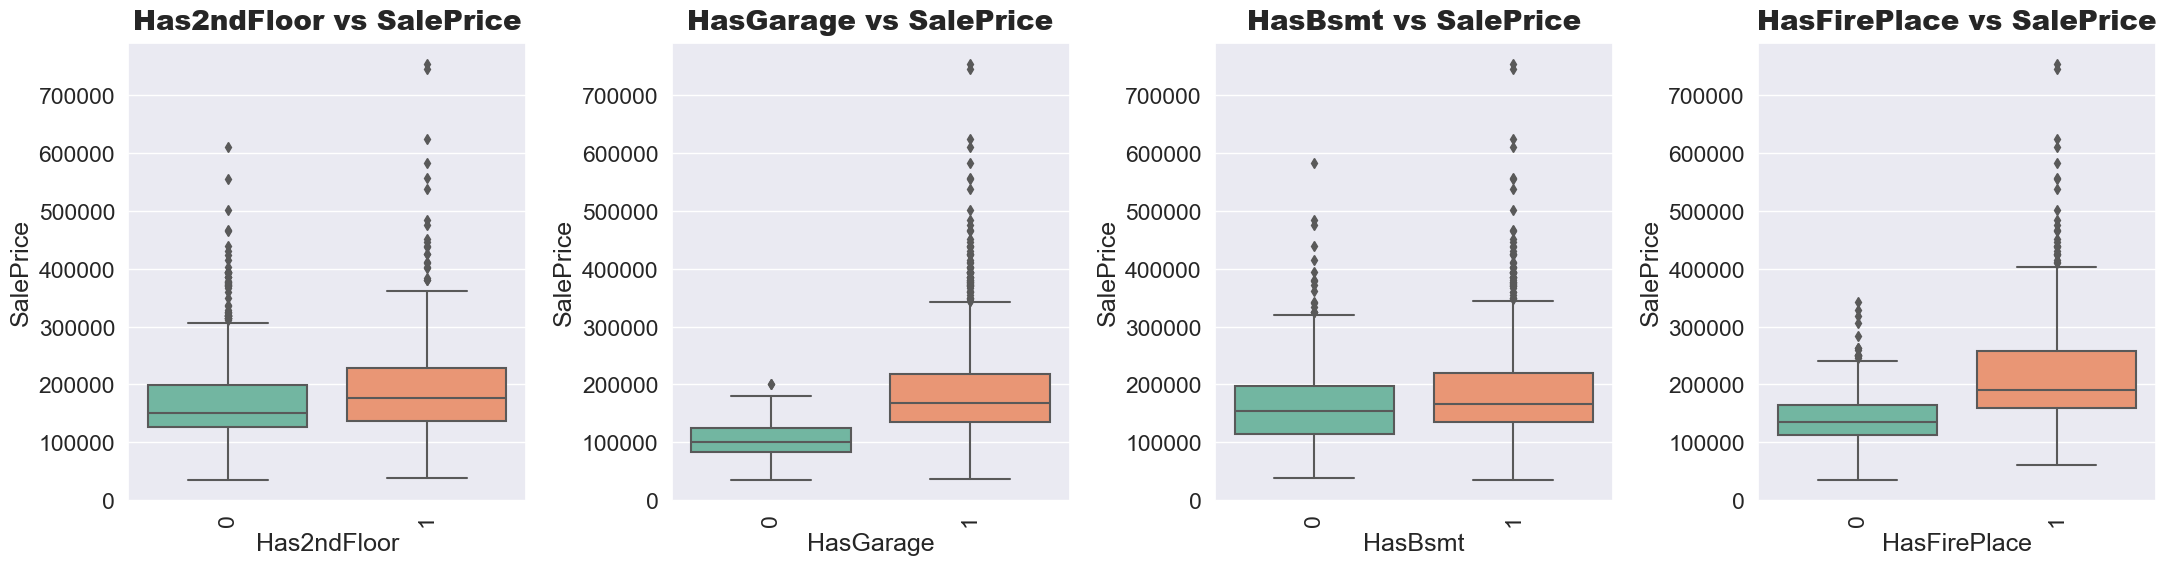

In [149]:
plt.figure(figsize=(22,6))
for index,column in enumerate(["Has2ndFloor","HasGarage","HasBsmt","HasFirePlace"]):
    plt.subplot(1,4,index+1)
    sns.boxplot(x=column, y="SalePrice", data=train_df, palette="Set2")
    plt.title(f"{column} vs SalePrice",fontweight="black",pad=10,size=20)
    plt.xticks(rotation=90)
    plt.tight_layout()

Preprocessing


In [150]:
z = train_df["SalePrice"]

train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

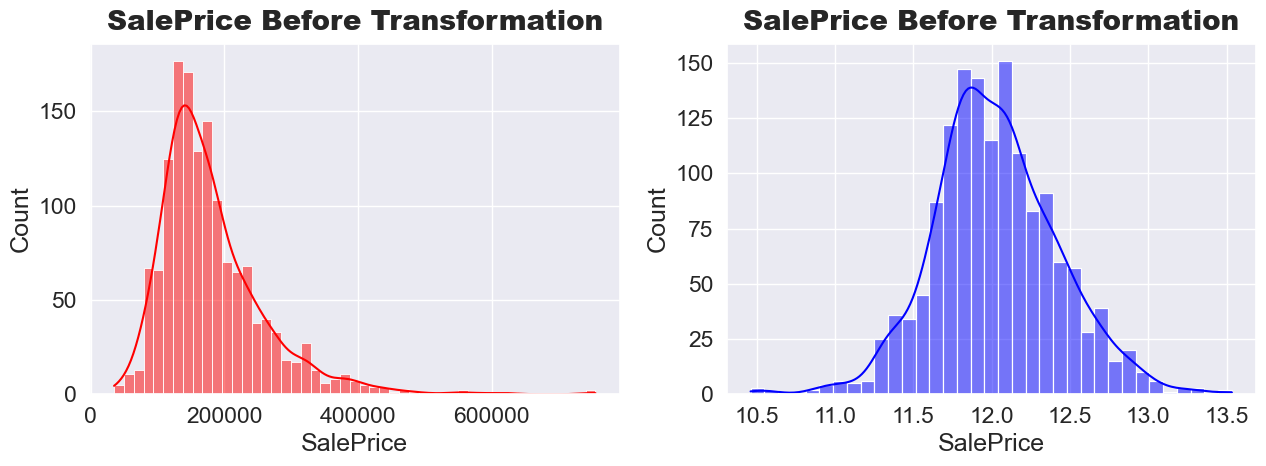

In [151]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.histplot(z,color="red",kde=True)
plt.title("SalePrice Before Transformation",size=20,pad=10,fontweight="black")

plt.subplot(1,2,2)
sns.histplot(train_df["SalePrice"],color="blue",kde=True)
plt.title("SalePrice Before Transformation",size=20,pad=10,fontweight="black")
plt.tight_layout()
plt.show()

In [152]:
con_cols = ["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF",
            "GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF","PoolArea","MiscVal","AgeAtSale","Total_Porch_SF",
            "Total_sqr_footage"]

for feature in con_cols:
    train_df[feature] = boxcox1p(x=train_df[feature], y=boxcox_normmax(x=train_df[feature] + 1))
    test_df[feature] = boxcox1p(x=test_df[feature] + 1, y=boxcox_normmax(x=train_df[feature] + 1))

In [153]:
train_df[con_cols].skew().sort_values().to_frame().rename(columns={0:"Skewness"})

Skewness
GarageArea          0.179981
AgeAtSale           0.609030
2ndFlrSF            0.813030
Total_Porch_SF      1.102313
GrLivArea           1.366560
1stFlrSF            1.376757
TotalBsmtSF         1.405961
WoodDeckSF          1.541376
BsmtFinSF1          1.685503
Total_sqr_footage   2.163968
LotFrontage         2.213556
OpenPorchSF         2.364342
MasVnrArea          2.677616
LowQualFinSF        9.011341
LotArea            12.207688
PoolArea           14.828374
MiscVal            24.476794

In [154]:
cols = ["LotArea","MiscVal","LowQualFinSF","PoolArea"]

train_df.drop(columns=cols, inplace=True)
test_df.drop(columns=cols, inplace=True)

In [155]:
cols = ["Neighborhood","Exterior1st","Exterior2nd","HeatingQuality"]
for column in cols:
    data = train_df.groupby(column)["SalePrice"].mean()
    for value in data.index:
        train_df[column] = train_df[column].replace({value:data[value]})
        test_df[column] = test_df[column].replace({value:data[value]})

In [156]:
cols = ["HouseStyle","ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure","Electrical","KitchenQual",
        "GarageQual","GarageCond"]

In [157]:
encoder = LabelEncoder()

train_df[cols] = train_df[cols].apply(encoder.fit_transform)
test_df[cols] = test_df[cols].apply(encoder.fit_transform)

In [158]:
cols = train_df.select_dtypes(include="object").columns

In [159]:
train_df = pd.get_dummies(train_df, columns=cols)
test_df = pd.get_dummies(test_df,columns=cols)

In [160]:

train_df.shape

(1460, 143)

In [161]:
test_df.shape

(1459, 142)

In [162]:
X = train_df.drop(columns=["SalePrice"])
y = train_df["SalePrice"]

In [163]:
scaler =RobustScaler()

In [164]:
X_scaled = scaler.fit_transform(X)
test_df = scaler.fit_transform(test_df)

In [165]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=0)

In [166]:
print("Dimension of x_train:=>",x_train.shape)
print("Dimension of x_test:=>",x_test.shape)
print("Dimension of y_train:=>",y_train.shape)
print("Dimension of y_test:=>",y_test.shape)

Dimension of x_train:=> (1168, 142)
Dimension of x_test:=> (292, 142)
Dimension of y_train:=> (1168,)
Dimension of y_test:=> (292,)


MODEL CREATION

In [167]:
r2_value = []
adjusted_r2_value = []
mae_value = []
mse_value = []
rmse_value = []

In [168]:
def model_evaluation(model):
    model.fit(x_train, y_train)
    y_train_pred= model.predict(x_train)
    y_test_pred = model.predict(x_test)

    #Metrics Calculation.
    mae = mean_absolute_error(y_test,y_test_pred)
    mse = mean_squared_error(y_test,y_test_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,y_test_pred)
    adjusted_r2 = 1 - ((1-r2)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
   
    mae_value.append(mae)
    mse_value.append(mse)
    rmse_value.append(rmse)
    r2_value.append(r2)
    adjusted_r2_value.append(adjusted_r2) 
    
    print(f"R2 Score of the {model} model is=>",r2)
    print(f"Adjusted R2 Score of the {model} model is=>",adjusted_r2)
    print()
    print(f"MAE of {model} model is=>",mae)
    print(f"MSE of {model} model is=>",mse)
    print(f"RMSE of {model} model is=>",rmse)
    

    # Scatter plot.
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)    
    plt.scatter(y_train, y_train_pred, color='blue', label='Train')
    plt.scatter(y_test, y_test_pred, color='red', label='Test')
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.legend()
    plt.title('Scatter Plot',fontweight="black",size=20,pad=10)
    
    # Residual plot.
    plt.subplot(1,2,2)
    plt.scatter(y_train_pred, y_train_pred - y_train, color='blue', label='Train')
    plt.scatter(y_test_pred, y_test_pred - y_test, color='red', label='Test')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend()
    plt.title('Residual Plot',fontweight="black",size=20,pad=10)
    plt.show()

LINEAR REGRESSION

R2 Score of the LinearRegression() model is=> 0.7903706389432503
Adjusted R2 Score of the LinearRegression() model is=> 0.5905896371307775

MAE of LinearRegression() model is=> 0.0963454501860699
MSE of LinearRegression() model is=> 0.03173748003683359
RMSE of LinearRegression() model is=> 0.17815016148416365


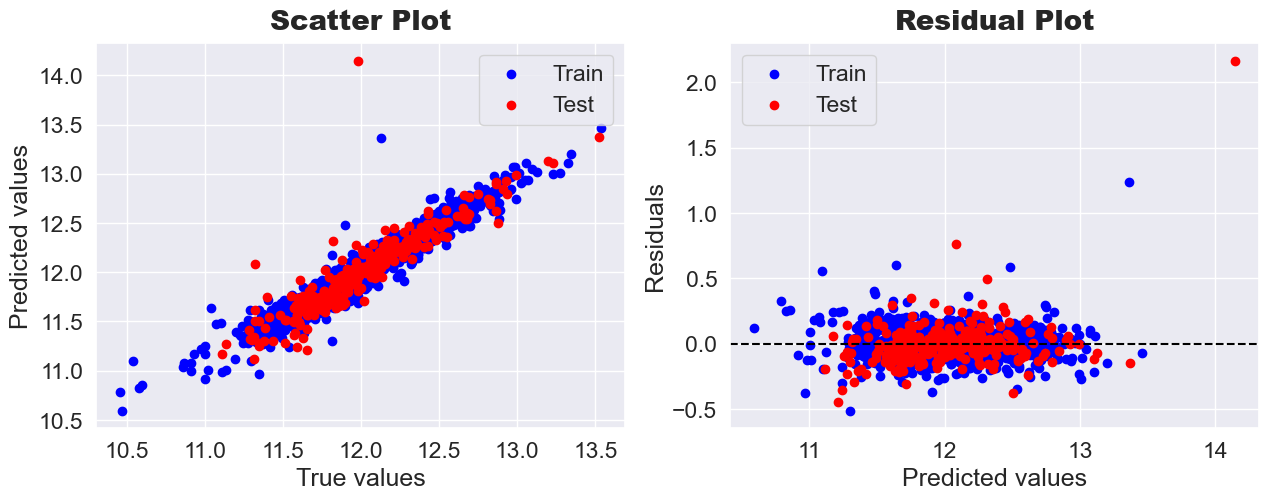

In [169]:
model_evaluation(LinearRegression())

SVM


R2 Score of the SVR() model is=> 0.8883789525732427
Adjusted R2 Score of the SVR() model is=> 0.7820018469719036

MAE of SVR() model is=> 0.09169261495242106
MSE of SVR() model is=> 0.016899210809683
RMSE of SVR() model is=> 0.12999696461719018


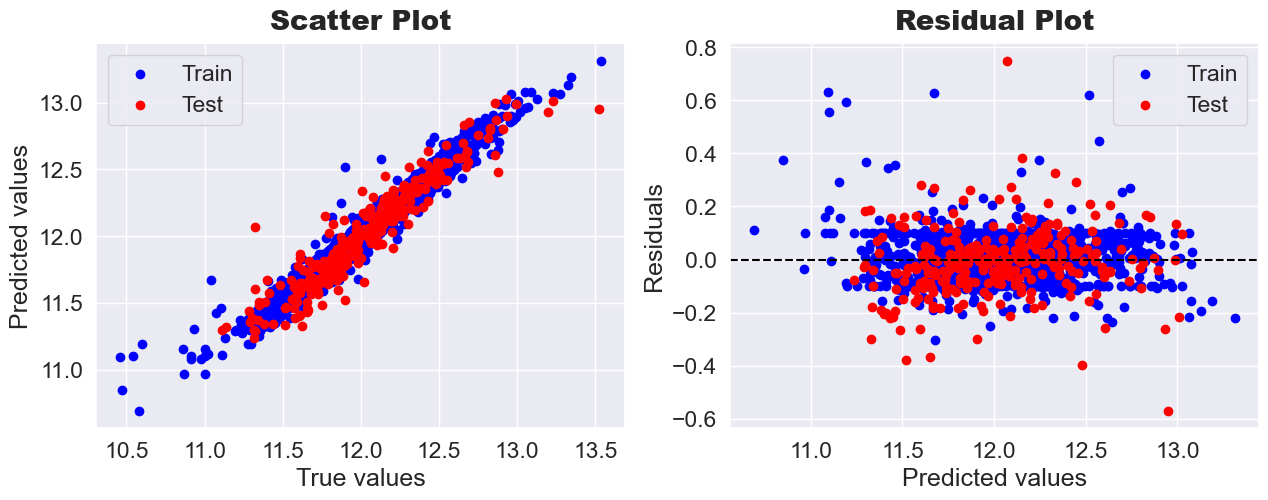

In [170]:
model_evaluation(SVR())

RANDOM FOREST REGRESSOR

R2 Score of the RandomForestRegressor() model is=> 0.86879798897202
Adjusted R2 Score of the RandomForestRegressor() model is=> 0.7437598308111263

MAE of RandomForestRegressor() model is=> 0.09957419706697036
MSE of RandomForestRegressor() model is=> 0.019863730847634833
RMSE of RandomForestRegressor() model is=> 0.14093874856700989


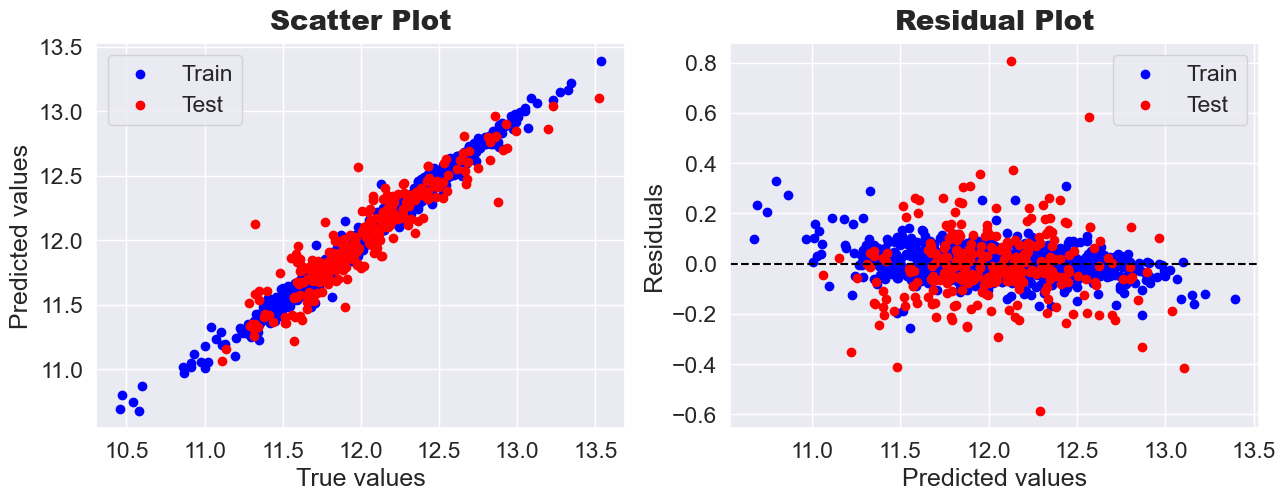

In [171]:
model_evaluation(RandomForestRegressor())

R2 Score of the AdaBoostRegressor() model is=> 0.803797827064502
Adjusted R2 Score of the AdaBoostRegressor() model is=> 0.6168132058776514

MAE of AdaBoostRegressor() model is=> 0.13082832580234713
MSE of AdaBoostRegressor() model is=> 0.029704629710902063
RMSE of AdaBoostRegressor() model is=> 0.1723503110264152


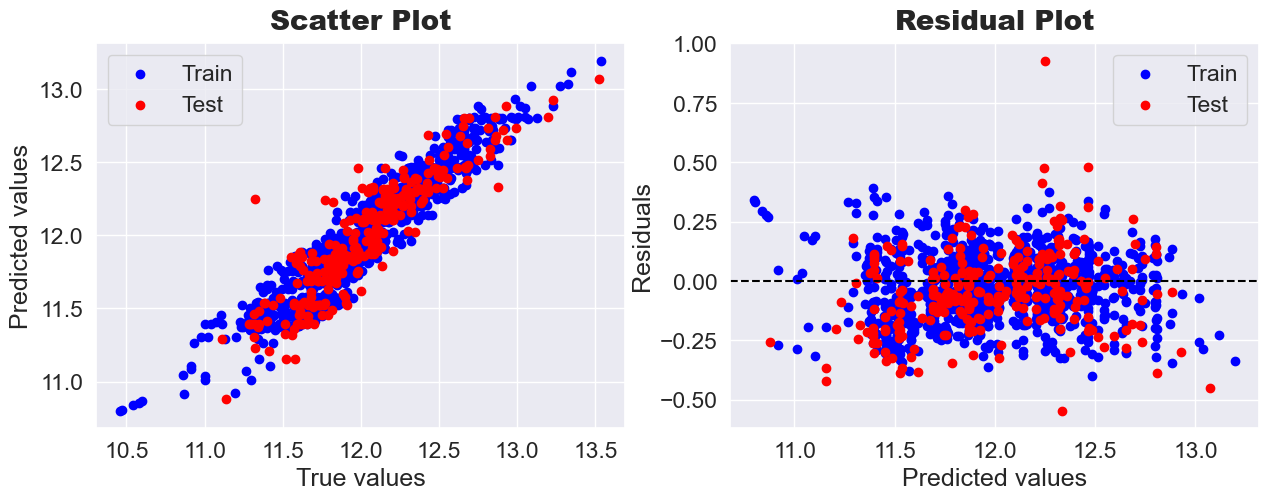

In [172]:
model_evaluation(AdaBoostRegressor())

R2 Score of the GradientBoostingRegressor() model is=> 0.8765907108583283
Adjusted R2 Score of the GradientBoostingRegressor() model is=> 0.7589791735555271

MAE of GradientBoostingRegressor() model is=> 0.09750243253775666
MSE of GradientBoostingRegressor() model is=> 0.01868392781788485
RMSE of GradientBoostingRegressor() model is=> 0.13668916496154643


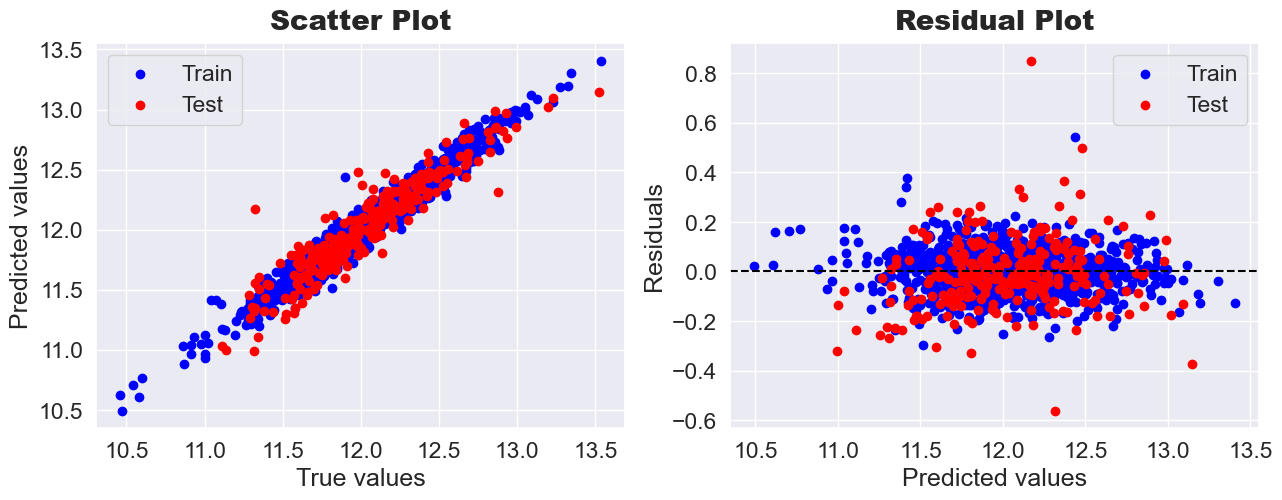

In [173]:
model_evaluation(GradientBoostingRegressor())